# Logistic Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
data = pd.read_csv(os.path.join('Data', 'w_secondaryGenre.csv'))
data.head()

,id,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,primary_genres,secondary_genres,PrimarynSecondary_genres
0,26854,Young Boss,0.145000,0.986000,229669.0000,0.597000,0.000002,0.197000,-6.809000,0.308000,115.004000,0.761000,44.000000,8,1,1,['vapor trap'],rap,trap,rap/trap
1,113,4B,0.004410,0.630000,224052.0000,0.851000,0.021800,0.093900,-4.610000,0.319000,150.054000,0.573000,54.000000,1,1,1,"['brostep', 'electro house', 'electronic trap']",rap,trap,rap/trap
2,12857,Keith Ape,0.030928,0.734000,236647.0000,0.701000,0.000004,0.202000,-5.305500,0.166100,129.040000,0.339500,61.000000,9,1,2,"['korean trap', 'underground hip hop']",rap,trap,rap/trap
3,18347,Paloma Mami,0.411000,0.876000,159132.0000,0.568000,0.002740,0.187000,-5.755000,0.053300,98.027000,0.593000,74.000000,0,1,2,"['latin pop', 'reggaeton chileno', 'trap chile...",rap,trap,rap/trap
4,20074,Rich The Kid,0.104304,0.810042,194635.9167,0.640417,0.000338,0.192833,-6.649042,0.225142,132.294208,0.504083,68.208333,11,1,24,"['atl hip hop', 'hip hop', 'melodic rap', 'pop...",rap,trap,rap/trap


In [3]:
cleaned_data=data.drop(["id","artists","count","genres","popularity","primary_genres","PrimarynSecondary_genres"],axis=1)
cleaned_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,secondary_genres
0,0.145000,0.986000,229669.0000,0.597000,0.000002,0.197000,-6.809000,0.308000,115.004000,0.761000,8,1,trap
1,0.004410,0.630000,224052.0000,0.851000,0.021800,0.093900,-4.610000,0.319000,150.054000,0.573000,1,1,trap
2,0.030928,0.734000,236647.0000,0.701000,0.000004,0.202000,-5.305500,0.166100,129.040000,0.339500,9,1,trap
3,0.411000,0.876000,159132.0000,0.568000,0.002740,0.187000,-5.755000,0.053300,98.027000,0.593000,0,1,trap
4,0.104304,0.810042,194635.9167,0.640417,0.000338,0.192833,-6.649042,0.225142,132.294208,0.504083,11,1,trap


In [4]:
X = cleaned_data.drop("secondary_genres", axis=1)
y = cleaned_data["secondary_genres"]
print(X.shape, y.shape)

(700, 12) (700,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_Scaler=MinMaxScaler().fit(X_train)
X_train_scaled1 = X_Scaler.transform(X_train)
X_test_scaled1 = X_Scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',C=10, solver= 'newton-cg')
classifier

LogisticRegression(C=10, solver='newton-cg')

In [46]:
classifier.fit(X_train_scaled1, y_train)

LogisticRegression(C=10, solver='newton-cg')

In [47]:
print(f"Training Data Score: {classifier.score(X_train_scaled1, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled1, y_test)}")

Training Data Score: 0.8380952380952381
Testing Data Score: 0.8057142857142857


In [48]:
predictions = classifier.predict(X_test_scaled1)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['cool jazz' 'cool jazz' 'texas country' 'cool jazz' 'trap'
 'electro house' 'electro house' 'salsa' 'texas country' 'salsa']
First 10 Actual labels: ['cool jazz', 'cool jazz', 'texas country', 'cool jazz', 'texas country', 'alternative metal', 'electro house', 'salsa', 'texas country', 'electro house']


In [49]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,cool jazz,cool jazz
1,cool jazz,cool jazz
2,texas country,texas country
3,cool jazz,cool jazz
4,trap,texas country
...,...,...
170,texas country,texas country
171,performance,performance
172,electro house,electro house
173,cool jazz,cool jazz


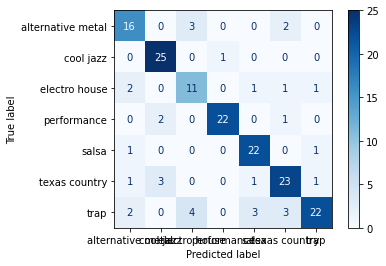

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test_scaled1, y_test, cmap=plt.cm.Blues)

plt.show()

# Hyperparameter Tuning

In [14]:
classifier.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l1','l2'],
              'C': [100, 10, 1.0, 0.1, 0.01,0.001,0.0001,0.0005,0.005],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear']}
grid = GridSearchCV(classifier, param_grid, verbose=3)

In [42]:
grid.fit(X_train_scaled1, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] C=100, penalty=l1, solver=newton-cg .............................
[CV] ... C=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=newton-cg .............................
[CV] ... C=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=newton-cg .............................
[CV] ... C=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=newton-cg .............................
[CV] ... C=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=newton-cg .............................
[CV] ... C=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=lbfgs .................................
[CV] ....... C=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=lbfgs .................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    

[CV] . C=100, penalty=l1, solver=liblinear, score=0.771, total=   0.2s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.810, total=   0.2s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.724, total=   0.2s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.829, total=   0.2s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.790, total=   0.2s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] . C=100, penalty=l2, solver=newton-cg, score=0.762, total=   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] . C=100, penalty=l2, solver=newton-cg, score=0.829, total=   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .

D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

[CV] . C=100, penalty=l2, solver=liblinear, score=0.790, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] . C=100, penalty=l2, solver=liblinear, score=0.733, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] . C=100, penalty=l2, solver=liblinear, score=0.829, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] . C=100, penalty=l2, solver=liblinear, score=0.800, total=   0.0s
[CV] C=10, penalty=l1, solver=newton-cg ..............................
[CV] .... C=10, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, penalty=l1, solver=newton-cg ..............................
[CV] .... C=10, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, penalty=l1, solver=newton-cg ..............................
[CV] .... C=10, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, penalty=l1, solver=newton-cg ..............................
[CV] .

D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The scor

[CV] .. C=10, penalty=l1, solver=liblinear, score=0.810, total=   0.1s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.733, total=   0.2s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.829, total=   0.1s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.800, total=   0.1s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .. C=10, penalty=l2, solver=newton-cg, score=0.762, total=   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .. C=10, penalty=l2, solver=newton-cg, score=0.829, total=   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .. C=10, penalty=l2, solver=newton-cg, score=0.781, total=   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .

D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.800, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.771, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.800, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.686, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.819, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.781, total=   0.0s
[CV] C=1.0, penalty=l1, solver=newton-cg .............................
[CV] ... C=1.0, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, penalty=l1, solver=newton-cg .............................
[CV] .

D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The scor

[CV] . C=1.0, penalty=l2, solver=newton-cg, score=0.705, total=   0.0s
[CV] C=1.0, penalty=l2, solver=newton-cg .............................
[CV] . C=1.0, penalty=l2, solver=newton-cg, score=0.819, total=   0.0s
[CV] C=1.0, penalty=l2, solver=newton-cg .............................
[CV] . C=1.0, penalty=l2, solver=newton-cg, score=0.762, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.771, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.781, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.705, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.819, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] .

D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The scor

[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0.648, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0.648, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.676, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.581, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.619, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.610, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.610, total=   0.0s
[CV] C=0.01, penalty=l1, solver=newton-cg ............................
[CV] .

D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The scor


[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] . C=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=lbfgs ...............................
[CV] ..... C=0.001, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=lbfgs ...............................
[CV] ..... C=0.001, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=lbfgs ...............................
[CV] ..... C=0.001, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=lbfgs ...............................
[CV] ..... C=0.001, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=lbfgs ...............................
[CV] ..... C=0.001, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, score=0.143, total=   0.0s
[CV]

D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The scor

[CV]  C=0.0001, penalty=l2, solver=newton-cg, score=0.152, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=lbfgs ..............................
[CV] .. C=0.0001, penalty=l2, solver=lbfgs, score=0.162, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=lbfgs ..............................
[CV] .. C=0.0001, penalty=l2, solver=lbfgs, score=0.162, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=lbfgs ..............................
[CV] .. C=0.0001, penalty=l2, solver=lbfgs, score=0.162, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=lbfgs ..............................
[CV] .. C=0.0001, penalty=l2, solver=lbfgs, score=0.162, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=lbfgs ..............................
[CV] .. C=0.0001, penalty=l2, solver=lbfgs, score=0.152, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l2, solver=liblinear, score=0.429, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[C

D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The scor

GridSearchCV(estimator=LogisticRegression(C=29.76),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001, 0.0005,
                               0.005],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=3)

In [43]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.8057142857142857


# Random Forest

In [83]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled1, y_train)
clf.score(X_test_scaled1, y_test)

0.7028571428571428

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth= 10, min_samples_leaf= 1, min_samples_split= 5)
rf = rf.fit(X_train_scaled1, y_train)
rf.score(X_test_scaled1, y_test)

0.8114285714285714

In [53]:
feature_names = cleaned_data.columns

In [54]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.15196375225981817, 'energy'),
 (0.15074890991885914, 'danceability'),
 (0.14883587309490598, 'acousticness'),
 (0.11955810880163838, 'valence'),
 (0.10208146682890282, 'speechiness'),
 (0.09837898679880339, 'loudness'),
 (0.07014953083108592, 'instrumentalness'),
 (0.04872395911955923, 'duration_ms'),
 (0.047638665048492755, 'tempo'),
 (0.028845557223208033, 'liveness'),
 (0.0207050322565088, 'key'),
 (0.012370157818217322, 'mode')]

# Hyperparameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 600, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [60]:
param_grid = {'n_estimators': n_estimators,
               
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
grid = GridSearchCV(rf, param_grid, verbose=3)

In [61]:
grid.fit(X_train_scaled1, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.743, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.838, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.800, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.867, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.867, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.733, total=   0.6s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.857, total=   0.6s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400, s

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.790, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.857, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.829, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.733, total=   0.6s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.838, total=   0.6s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400, s

[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.762, total=   0.3s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.848, total=   0.3s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.857, total=   0.3s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400, score=0.733, total=   0.6s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400, score=0.857, total=   0.6s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400, s

[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.762, total=   0.3s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.876, total=   0.3s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.857, total=   0.3s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.743, total=   0.6s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.857, total=   0.6s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.8min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400, 600]},
             verbose=3)

In [63]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.8304761904761906


# KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [87]:
X_train_scaled3 = X_scaler.transform(X_train)
X_test_scaled3 = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.709
k: 3, Train/Test Score: 0.851/0.697
k: 5, Train/Test Score: 0.821/0.726
k: 7, Train/Test Score: 0.813/0.726
k: 9, Train/Test Score: 0.813/0.709
k: 11, Train/Test Score: 0.804/0.743
k: 13, Train/Test Score: 0.810/0.743
k: 15, Train/Test Score: 0.802/0.749
k: 17, Train/Test Score: 0.796/0.754
k: 19, Train/Test Score: 0.790/0.743


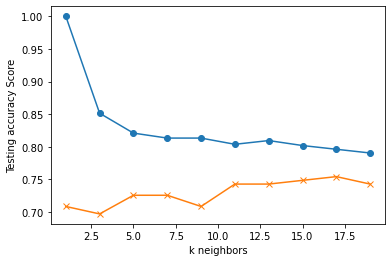

In [108]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled3, y_train)
    train_score = knn.score(X_train_scaled3, y_train)
    test_score = knn.score(X_test_scaled3, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [89]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled3, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled3, y_test))

k=13 Test Acc: 0.743


In [111]:
knn = KNeighborsClassifier(leaf_size= 1, n_neighbors= 12, p= 1)
knn.fit(X_train_scaled3, y_train)
print(knn.score(X_test_scaled3, y_test))

0.7771428571428571


# Hyperparameter Tuning

In [90]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [101]:
#List Hyperparameters that we want to tune.
leaf_size = [int(x) for x in np.linspace(start = 1, stop = 50, num = 50)]
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 30, num = 30)]
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [102]:
param_grid = {'leaf_size': leaf_size,
               
               'n_neighbors': n_neighbors,
               'p': p,
               }
grid = GridSearchCV(knn, param_grid, verbose=3)

In [103]:
#Fit the model
grid.fit(X_train_scaled3, y_train)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.695, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.714, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.714, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.781, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.771, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=2, score=0.638, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=2 .................................
[CV] ..... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... leaf_size=1, n_neighbors=2, p=2, score=0.743, total=   0.0s
[CV] leaf_size=1, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=3, p=1, score=0.714, total=   0.0s
[CV] leaf_size=1, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=3, p=1, score=0.819, total=   0.0s
[CV] leaf_size=1, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=3, p=1, score=0.705, total=   0.0s
[CV] leaf_size=1, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=3, p=1, score=0.771, total=   0.0s
[CV] leaf_size=1, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=3, p=1, score=0.781, total=   0.0s
[CV] leaf_size=1, n_neighbors=3, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=3, p=2, score=0.705, total=   0.0s
[CV] leaf_size=1, n_neighbors=3, p=2 .................................
[CV] .

[CV] ..... leaf_size=1, n_neighbors=9, p=2, score=0.733, total=   0.0s
[CV] leaf_size=1, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=9, p=2, score=0.724, total=   0.0s
[CV] leaf_size=1, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=9, p=2, score=0.790, total=   0.0s
[CV] leaf_size=1, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=9, p=2, score=0.752, total=   0.0s
[CV] leaf_size=1, n_neighbors=10, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=10, p=1, score=0.790, total=   0.0s
[CV] leaf_size=1, n_neighbors=10, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=10, p=1, score=0.771, total=   0.0s
[CV] leaf_size=1, n_neighbors=10, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=10, p=1, score=0.733, total=   0.0s
[CV] leaf_size=1, n_neighbors=10, p=1 ................................
[CV] .

[CV] .... leaf_size=1, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=1, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=1, n_neighbors=15, p=2, score=0.781, total=   0.0s
[CV] leaf_size=1, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=1, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=1, n_neighbors=16, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=16, p=1, score=0.771, total=   0.0s
[CV] leaf_size=1, n_neighbors=16, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=16, p=1, score=0.743, total=   0.0s
[CV] leaf_size=1, n_neighbors=16, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=16, p=1, score=0.752, total=   0.0s
[CV] leaf_size=1, n_neighbors=16, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=16, p=1, score=0.829, total=   0.0s
[CV] leaf_size=1, n_neighbors=16, p=1 ................................
[CV] .

[CV] .... leaf_size=1, n_neighbors=21, p=2, score=0.781, total=   0.0s
[CV] leaf_size=1, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=1, n_neighbors=21, p=2, score=0.714, total=   0.0s
[CV] leaf_size=1, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=22, p=1, score=0.743, total=   0.0s
[CV] leaf_size=1, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=22, p=1, score=0.790, total=   0.0s
[CV] leaf_size=1, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=22, p=1, score=0.733, total=   0.0s
[CV] leaf_size=1, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=22, p=1, score=0.810, total=   0.0s
[CV] leaf_size=1, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=22, p=1, score=0.790, total=   0.0s
[CV] leaf_size=1, n_neighbors=22, p=2 ................................
[CV] .

[CV] .... leaf_size=1, n_neighbors=28, p=2, score=0.743, total=   0.0s
[CV] leaf_size=1, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=29, p=1, score=0.743, total=   0.0s
[CV] leaf_size=1, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=29, p=1, score=0.762, total=   0.0s
[CV] leaf_size=1, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=29, p=1, score=0.724, total=   0.0s
[CV] leaf_size=1, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=29, p=1, score=0.800, total=   0.0s
[CV] leaf_size=1, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=29, p=1, score=0.790, total=   0.0s
[CV] leaf_size=1, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=1, n_neighbors=29, p=2, score=0.695, total=   0.0s
[CV] leaf_size=1, n_neighbors=29, p=2 ................................
[CV] .

[CV] ..... leaf_size=2, n_neighbors=6, p=1, score=0.819, total=   0.0s
[CV] leaf_size=2, n_neighbors=6, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=6, p=1, score=0.848, total=   0.0s
[CV] leaf_size=2, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=2, n_neighbors=6, p=2, score=0.714, total=   0.0s
[CV] leaf_size=2, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=2, n_neighbors=6, p=2, score=0.705, total=   0.0s
[CV] leaf_size=2, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=2, n_neighbors=6, p=2, score=0.724, total=   0.0s
[CV] leaf_size=2, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=2, n_neighbors=6, p=2, score=0.810, total=   0.0s
[CV] leaf_size=2, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=2, n_neighbors=6, p=2, score=0.762, total=   0.0s
[CV] leaf_size=2, n_neighbors=7, p=1 .................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=12, p=1, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=12, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=12, p=1, score=0.800, total=   0.0s
[CV] leaf_size=2, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=12, p=2, score=0.743, total=   0.0s
[CV] leaf_size=2, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=12, p=2, score=0.695, total=   0.0s
[CV] leaf_size=2, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=12, p=2, score=0.714, total=   0.0s
[CV] leaf_size=2, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=12, p=2, score=0.752, total=   0.0s
[CV] leaf_size=2, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=12, p=2, score=0.762, total=   0.0s
[CV] leaf_size=2, n_neighbors=13, p=1 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=19, p=2, score=0.676, total=   0.0s
[CV] leaf_size=2, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=19, p=2, score=0.781, total=   0.0s
[CV] leaf_size=2, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=19, p=2, score=0.752, total=   0.0s
[CV] leaf_size=2, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=20, p=1, score=0.743, total=   0.0s
[CV] leaf_size=2, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=20, p=1, score=0.762, total=   0.0s
[CV] leaf_size=2, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=20, p=1, score=0.743, total=   0.0s
[CV] leaf_size=2, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=20, p=1, score=0.829, total=   0.0s
[CV] leaf_size=2, n_neighbors=20, p=1 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=27, p=1, score=0.743, total=   0.0s
[CV] leaf_size=2, n_neighbors=27, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=27, p=1, score=0.752, total=   0.0s
[CV] leaf_size=2, n_neighbors=27, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=27, p=1, score=0.733, total=   0.0s
[CV] leaf_size=2, n_neighbors=27, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=27, p=1, score=0.810, total=   0.0s
[CV] leaf_size=2, n_neighbors=27, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=27, p=1, score=0.790, total=   0.0s
[CV] leaf_size=2, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=27, p=2, score=0.733, total=   0.0s
[CV] leaf_size=2, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=27, p=2, score=0.724, total=   0.0s
[CV] leaf_size=2, n_neighbors=27, p=2 ................................
[CV] .

[CV] ..... leaf_size=3, n_neighbors=2, p=2, score=0.743, total=   0.0s
[CV] leaf_size=3, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=3, n_neighbors=3, p=1, score=0.714, total=   0.0s
[CV] leaf_size=3, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=3, n_neighbors=3, p=1, score=0.819, total=   0.0s
[CV] leaf_size=3, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=3, n_neighbors=3, p=1, score=0.705, total=   0.0s
[CV] leaf_size=3, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=3, n_neighbors=3, p=1, score=0.771, total=   0.0s
[CV] leaf_size=3, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=3, n_neighbors=3, p=1, score=0.781, total=   0.0s
[CV] leaf_size=3, n_neighbors=3, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=3, p=2, score=0.705, total=   0.0s
[CV] leaf_size=3, n_neighbors=3, p=2 .................................
[CV] .

[CV] ..... leaf_size=3, n_neighbors=9, p=1, score=0.838, total=   0.0s
[CV] leaf_size=3, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=3, n_neighbors=9, p=1, score=0.819, total=   0.0s
[CV] leaf_size=3, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=9, p=2, score=0.714, total=   0.0s
[CV] leaf_size=3, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=9, p=2, score=0.733, total=   0.0s
[CV] leaf_size=3, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=9, p=2, score=0.724, total=   0.0s
[CV] leaf_size=3, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=9, p=2, score=0.790, total=   0.0s
[CV] leaf_size=3, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=9, p=2, score=0.752, total=   0.0s
[CV] leaf_size=3, n_neighbors=10, p=1 ................................
[CV] .

[CV] .... leaf_size=3, n_neighbors=16, p=2, score=0.752, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=17, p=1, score=0.781, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=17, p=1, score=0.829, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=17, p=1, score=0.810, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=17, p=2, score=0.752, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=2 ................................
[CV] .

[CV] .... leaf_size=3, n_neighbors=22, p=2, score=0.810, total=   0.0s
[CV] leaf_size=3, n_neighbors=22, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=22, p=2, score=0.733, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=23, p=1, score=0.752, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=23, p=1, score=0.790, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=23, p=1, score=0.743, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=23, p=1, score=0.810, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=23, p=1, score=0.762, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=2 ................................
[CV] .

[CV] .... leaf_size=3, n_neighbors=28, p=2, score=0.781, total=   0.0s
[CV] leaf_size=3, n_neighbors=28, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=28, p=2, score=0.743, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=29, p=1, score=0.743, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=29, p=1, score=0.762, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=29, p=1, score=0.724, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=29, p=1, score=0.800, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=29, p=1, score=0.790, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=2 ................................
[CV] .

[CV] ..... leaf_size=4, n_neighbors=5, p=2, score=0.781, total=   0.0s
[CV] leaf_size=4, n_neighbors=6, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=6, p=1, score=0.781, total=   0.0s
[CV] leaf_size=4, n_neighbors=6, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=6, p=1, score=0.800, total=   0.0s
[CV] leaf_size=4, n_neighbors=6, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=6, p=1, score=0.762, total=   0.0s
[CV] leaf_size=4, n_neighbors=6, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=6, p=1, score=0.819, total=   0.0s
[CV] leaf_size=4, n_neighbors=6, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=6, p=1, score=0.848, total=   0.0s
[CV] leaf_size=4, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=4, n_neighbors=6, p=2, score=0.714, total=   0.0s
[CV] leaf_size=4, n_neighbors=6, p=2 .................................
[CV] .

[CV] .... leaf_size=4, n_neighbors=13, p=2, score=0.771, total=   0.0s
[CV] leaf_size=4, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=13, p=2, score=0.705, total=   0.0s
[CV] leaf_size=4, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=13, p=2, score=0.771, total=   0.0s
[CV] leaf_size=4, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=13, p=2, score=0.790, total=   0.0s
[CV] leaf_size=4, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=13, p=2, score=0.743, total=   0.0s
[CV] leaf_size=4, n_neighbors=14, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=14, p=1, score=0.771, total=   0.0s
[CV] leaf_size=4, n_neighbors=14, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=14, p=1, score=0.771, total=   0.0s
[CV] leaf_size=4, n_neighbors=14, p=1 ................................
[CV] .

[CV] .... leaf_size=4, n_neighbors=20, p=2, score=0.686, total=   0.0s
[CV] leaf_size=4, n_neighbors=20, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=20, p=2, score=0.800, total=   0.0s
[CV] leaf_size=4, n_neighbors=20, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=20, p=2, score=0.733, total=   0.0s
[CV] leaf_size=4, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=21, p=1, score=0.743, total=   0.0s
[CV] leaf_size=4, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=21, p=1, score=0.781, total=   0.0s
[CV] leaf_size=4, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=21, p=1, score=0.733, total=   0.0s
[CV] leaf_size=4, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=21, p=1, score=0.819, total=   0.0s
[CV] leaf_size=4, n_neighbors=21, p=1 ................................
[CV] .

[CV] .... leaf_size=4, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=4, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=27, p=2, score=0.781, total=   0.0s
[CV] leaf_size=4, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=27, p=2, score=0.752, total=   0.0s
[CV] leaf_size=4, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=28, p=1, score=0.743, total=   0.0s
[CV] leaf_size=4, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=28, p=1, score=0.790, total=   0.0s
[CV] leaf_size=4, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=28, p=1, score=0.733, total=   0.0s
[CV] leaf_size=4, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=28, p=1, score=0.810, total=   0.0s
[CV] leaf_size=4, n_neighbors=28, p=1 ................................
[CV] .

[CV] ..... leaf_size=5, n_neighbors=5, p=1, score=0.752, total=   0.0s
[CV] leaf_size=5, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=5, p=1, score=0.781, total=   0.0s
[CV] leaf_size=5, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=5, p=1, score=0.724, total=   0.0s
[CV] leaf_size=5, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=5, p=1, score=0.781, total=   0.0s
[CV] leaf_size=5, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=5, p=1, score=0.790, total=   0.0s
[CV] leaf_size=5, n_neighbors=5, p=2 .................................
[CV] ..... leaf_size=5, n_neighbors=5, p=2, score=0.714, total=   0.0s
[CV] leaf_size=5, n_neighbors=5, p=2 .................................
[CV] ..... leaf_size=5, n_neighbors=5, p=2, score=0.724, total=   0.0s
[CV] leaf_size=5, n_neighbors=5, p=2 .................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=12, p=1, score=0.867, total=   0.0s
[CV] leaf_size=5, n_neighbors=12, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=12, p=1, score=0.800, total=   0.0s
[CV] leaf_size=5, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=12, p=2, score=0.743, total=   0.0s
[CV] leaf_size=5, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=12, p=2, score=0.695, total=   0.0s
[CV] leaf_size=5, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=12, p=2, score=0.714, total=   0.0s
[CV] leaf_size=5, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=12, p=2, score=0.752, total=   0.0s
[CV] leaf_size=5, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=12, p=2, score=0.762, total=   0.0s
[CV] leaf_size=5, n_neighbors=13, p=1 ................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=19, p=1, score=0.743, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=19, p=1, score=0.724, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=19, p=1, score=0.752, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=19, p=1, score=0.838, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=19, p=1, score=0.781, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=19, p=2, score=0.743, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=19, p=2, score=0.733, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=2 ................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=25, p=1, score=0.790, total=   0.0s
[CV] leaf_size=5, n_neighbors=25, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=25, p=1, score=0.781, total=   0.0s
[CV] leaf_size=5, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=25, p=2, score=0.733, total=   0.0s
[CV] leaf_size=5, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=25, p=2, score=0.743, total=   0.0s
[CV] leaf_size=5, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=25, p=2, score=0.695, total=   0.0s
[CV] leaf_size=5, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=25, p=2, score=0.781, total=   0.0s
[CV] leaf_size=5, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=25, p=2, score=0.733, total=   0.0s
[CV] leaf_size=5, n_neighbors=26, p=1 ................................
[CV] .

[CV] ..... leaf_size=6, n_neighbors=1, p=2, score=0.686, total=   0.0s
[CV] leaf_size=6, n_neighbors=1, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=1, p=2, score=0.705, total=   0.0s
[CV] leaf_size=6, n_neighbors=1, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=1, p=2, score=0.771, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=6, n_neighbors=2, p=1, score=0.686, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=6, n_neighbors=2, p=1, score=0.714, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=6, n_neighbors=2, p=1, score=0.705, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=6, n_neighbors=2, p=1, score=0.724, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=1 .................................
[CV] .

[CV] ..... leaf_size=6, n_neighbors=9, p=1, score=0.819, total=   0.0s
[CV] leaf_size=6, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=9, p=2, score=0.714, total=   0.0s
[CV] leaf_size=6, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=9, p=2, score=0.733, total=   0.0s
[CV] leaf_size=6, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=9, p=2, score=0.724, total=   0.0s
[CV] leaf_size=6, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=9, p=2, score=0.790, total=   0.0s
[CV] leaf_size=6, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=9, p=2, score=0.752, total=   0.0s
[CV] leaf_size=6, n_neighbors=10, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=10, p=1, score=0.790, total=   0.0s
[CV] leaf_size=6, n_neighbors=10, p=1 ................................
[CV] .

[CV] .... leaf_size=6, n_neighbors=16, p=2, score=0.724, total=   0.0s
[CV] leaf_size=6, n_neighbors=16, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=16, p=2, score=0.705, total=   0.0s
[CV] leaf_size=6, n_neighbors=16, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=16, p=2, score=0.800, total=   0.0s
[CV] leaf_size=6, n_neighbors=16, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=16, p=2, score=0.752, total=   0.0s
[CV] leaf_size=6, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=17, p=1, score=0.781, total=   0.0s
[CV] leaf_size=6, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=6, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=6, n_neighbors=17, p=1 ................................
[CV] .

[CV] .... leaf_size=6, n_neighbors=23, p=2, score=0.743, total=   0.0s
[CV] leaf_size=6, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=23, p=2, score=0.733, total=   0.0s
[CV] leaf_size=6, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=23, p=2, score=0.686, total=   0.0s
[CV] leaf_size=6, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=23, p=2, score=0.810, total=   0.0s
[CV] leaf_size=6, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=23, p=2, score=0.733, total=   0.0s
[CV] leaf_size=6, n_neighbors=24, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=24, p=1, score=0.752, total=   0.0s
[CV] leaf_size=6, n_neighbors=24, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=24, p=1, score=0.771, total=   0.0s
[CV] leaf_size=6, n_neighbors=24, p=1 ................................
[CV] .

[CV] .... leaf_size=6, n_neighbors=30, p=2, score=0.676, total=   0.0s
[CV] leaf_size=6, n_neighbors=30, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=30, p=2, score=0.762, total=   0.0s
[CV] leaf_size=6, n_neighbors=30, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=30, p=2, score=0.724, total=   0.0s
[CV] leaf_size=7, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=7, n_neighbors=1, p=1, score=0.695, total=   0.0s
[CV] leaf_size=7, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=7, n_neighbors=1, p=1, score=0.714, total=   0.0s
[CV] leaf_size=7, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=7, n_neighbors=1, p=1, score=0.714, total=   0.0s
[CV] leaf_size=7, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=7, n_neighbors=1, p=1, score=0.781, total=   0.0s
[CV] leaf_size=7, n_neighbors=1, p=1 .................................
[CV] .

[CV] ..... leaf_size=7, n_neighbors=9, p=1, score=0.743, total=   0.0s
[CV] leaf_size=7, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=7, n_neighbors=9, p=1, score=0.838, total=   0.0s
[CV] leaf_size=7, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=7, n_neighbors=9, p=1, score=0.819, total=   0.0s
[CV] leaf_size=7, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=9, p=2, score=0.714, total=   0.0s
[CV] leaf_size=7, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=9, p=2, score=0.733, total=   0.0s
[CV] leaf_size=7, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=9, p=2, score=0.724, total=   0.0s
[CV] leaf_size=7, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=9, p=2, score=0.790, total=   0.0s
[CV] leaf_size=7, n_neighbors=9, p=2 .................................
[CV] .

[CV] .... leaf_size=7, n_neighbors=17, p=1, score=0.781, total=   0.0s
[CV] leaf_size=7, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=7, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=7, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=17, p=1, score=0.829, total=   0.0s
[CV] leaf_size=7, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=17, p=1, score=0.810, total=   0.0s
[CV] leaf_size=7, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=17, p=2, score=0.752, total=   0.0s
[CV] leaf_size=7, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=17, p=2, score=0.752, total=   0.0s
[CV] leaf_size=7, n_neighbors=17, p=2 ................................
[CV] .

[CV] .... leaf_size=7, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=24, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=24, p=2, score=0.819, total=   0.0s
[CV] leaf_size=7, n_neighbors=24, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=24, p=2, score=0.743, total=   0.0s
[CV] leaf_size=7, n_neighbors=25, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=25, p=1, score=0.743, total=   0.0s
[CV] leaf_size=7, n_neighbors=25, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=25, p=1, score=0.771, total=   0.0s
[CV] leaf_size=7, n_neighbors=25, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=25, p=1, score=0.733, total=   0.0s
[CV] leaf_size=7, n_neighbors=25, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=25, p=1, score=0.790, total=   0.0s
[CV] leaf_size=7, n_neighbors=25, p=1 ................................
[CV] .

[CV] ..... leaf_size=8, n_neighbors=2, p=2, score=0.657, total=   0.0s
[CV] leaf_size=8, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=8, n_neighbors=2, p=2, score=0.638, total=   0.0s
[CV] leaf_size=8, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=8, n_neighbors=2, p=2, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=8, n_neighbors=2, p=2, score=0.686, total=   0.0s
[CV] leaf_size=8, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=8, n_neighbors=2, p=2, score=0.743, total=   0.0s
[CV] leaf_size=8, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=3, p=1, score=0.714, total=   0.0s
[CV] leaf_size=8, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=3, p=1, score=0.819, total=   0.0s
[CV] leaf_size=8, n_neighbors=3, p=1 .................................
[CV] .

[CV] .... leaf_size=8, n_neighbors=10, p=2, score=0.743, total=   0.0s
[CV] leaf_size=8, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=11, p=1, score=0.790, total=   0.0s
[CV] leaf_size=8, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=11, p=1, score=0.781, total=   0.0s
[CV] leaf_size=8, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=11, p=1, score=0.762, total=   0.0s
[CV] leaf_size=8, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=11, p=1, score=0.857, total=   0.0s
[CV] leaf_size=8, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=11, p=1, score=0.819, total=   0.0s
[CV] leaf_size=8, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=11, p=2, score=0.724, total=   0.0s
[CV] leaf_size=8, n_neighbors=11, p=2 ................................
[CV] .

[CV] .... leaf_size=8, n_neighbors=19, p=1, score=0.752, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=19, p=1, score=0.838, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=19, p=1, score=0.781, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=19, p=2, score=0.743, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=19, p=2, score=0.733, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=19, p=2, score=0.676, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=19, p=2, score=0.781, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=2 ................................
[CV] .

[CV] .... leaf_size=8, n_neighbors=27, p=1, score=0.733, total=   0.0s
[CV] leaf_size=8, n_neighbors=27, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=27, p=1, score=0.810, total=   0.0s
[CV] leaf_size=8, n_neighbors=27, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=27, p=1, score=0.790, total=   0.0s
[CV] leaf_size=8, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=27, p=2, score=0.733, total=   0.0s
[CV] leaf_size=8, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=27, p=2, score=0.724, total=   0.0s
[CV] leaf_size=8, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=27, p=2, score=0.781, total=   0.0s
[CV] leaf_size=8, n_neighbors=27, p=2 ................................
[CV] .

[CV] ..... leaf_size=9, n_neighbors=5, p=2, score=0.714, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=5, p=2, score=0.724, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=5, p=2, score=0.686, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=5, p=2, score=0.752, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=5, p=2, score=0.781, total=   0.0s
[CV] leaf_size=9, n_neighbors=6, p=1 .................................
[CV] ..... leaf_size=9, n_neighbors=6, p=1, score=0.781, total=   0.0s
[CV] leaf_size=9, n_neighbors=6, p=1 .................................
[CV] ..... leaf_size=9, n_neighbors=6, p=1, score=0.800, total=   0.0s
[CV] leaf_size=9, n_neighbors=6, p=1 .................................
[CV] .

[CV] .... leaf_size=9, n_neighbors=14, p=1, score=0.771, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=14, p=1, score=0.752, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=14, p=1, score=0.838, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=14, p=1, score=0.819, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=14, p=2, score=0.771, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=14, p=2, score=0.724, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=14, p=2, score=0.752, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=2 ................................
[CV] .

[CV] .... leaf_size=9, n_neighbors=22, p=1, score=0.733, total=   0.0s
[CV] leaf_size=9, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=22, p=1, score=0.810, total=   0.0s
[CV] leaf_size=9, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=22, p=1, score=0.790, total=   0.0s
[CV] leaf_size=9, n_neighbors=22, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=22, p=2, score=0.733, total=   0.0s
[CV] leaf_size=9, n_neighbors=22, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=22, p=2, score=0.724, total=   0.0s
[CV] leaf_size=9, n_neighbors=22, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=22, p=2, score=0.676, total=   0.0s
[CV] leaf_size=9, n_neighbors=22, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=22, p=2, score=0.810, total=   0.0s
[CV] leaf_size=9, n_neighbors=22, p=2 ................................
[CV] .

[CV] .... leaf_size=9, n_neighbors=29, p=2, score=0.743, total=   0.0s
[CV] leaf_size=9, n_neighbors=30, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=30, p=1, score=0.743, total=   0.0s
[CV] leaf_size=9, n_neighbors=30, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=30, p=1, score=0.781, total=   0.0s
[CV] leaf_size=9, n_neighbors=30, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=30, p=1, score=0.724, total=   0.0s
[CV] leaf_size=9, n_neighbors=30, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=30, p=1, score=0.790, total=   0.0s
[CV] leaf_size=9, n_neighbors=30, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=30, p=1, score=0.790, total=   0.0s
[CV] leaf_size=9, n_neighbors=30, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=30, p=2, score=0.686, total=   0.0s
[CV] leaf_size=9, n_neighbors=30, p=2 ................................
[CV] .

[CV] .... leaf_size=10, n_neighbors=8, p=1, score=0.790, total=   0.0s
[CV] leaf_size=10, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=10, n_neighbors=8, p=2, score=0.714, total=   0.0s
[CV] leaf_size=10, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=10, n_neighbors=8, p=2, score=0.762, total=   0.0s
[CV] leaf_size=10, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=10, n_neighbors=8, p=2, score=0.705, total=   0.0s
[CV] leaf_size=10, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=10, n_neighbors=8, p=2, score=0.810, total=   0.0s
[CV] leaf_size=10, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=10, n_neighbors=8, p=2, score=0.733, total=   0.0s
[CV] leaf_size=10, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=9, p=1, score=0.771, total=   0.0s
[CV] leaf_size=10, n_neighbors=9, p=1 ................................
[CV] .

[CV] ... leaf_size=10, n_neighbors=16, p=2, score=0.800, total=   0.0s
[CV] leaf_size=10, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=16, p=2, score=0.752, total=   0.0s
[CV] leaf_size=10, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=17, p=1, score=0.781, total=   0.0s
[CV] leaf_size=10, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=10, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=10, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=17, p=1, score=0.829, total=   0.0s
[CV] leaf_size=10, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=17, p=1, score=0.810, total=   0.0s
[CV] leaf_size=10, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=10, n_neighbors=24, p=2, score=0.752, total=   0.0s
[CV] leaf_size=10, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=24, p=2, score=0.743, total=   0.0s
[CV] leaf_size=10, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=24, p=2, score=0.819, total=   0.0s
[CV] leaf_size=10, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=24, p=2, score=0.743, total=   0.0s
[CV] leaf_size=10, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=25, p=1, score=0.743, total=   0.0s
[CV] leaf_size=10, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=25, p=1, score=0.771, total=   0.0s
[CV] leaf_size=10, n_neighbors=25, p=1 ...............................
[CV] .

[CV] .... leaf_size=11, n_neighbors=2, p=2, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=2, p=2, score=0.686, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=2, p=2, score=0.743, total=   0.0s
[CV] leaf_size=11, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=11, n_neighbors=3, p=1, score=0.714, total=   0.0s
[CV] leaf_size=11, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=11, n_neighbors=3, p=1, score=0.819, total=   0.0s
[CV] leaf_size=11, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=11, n_neighbors=3, p=1, score=0.705, total=   0.0s
[CV] leaf_size=11, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=11, n_neighbors=3, p=1, score=0.771, total=   0.0s
[CV] leaf_size=11, n_neighbors=3, p=1 ................................
[CV] .

[CV] ... leaf_size=11, n_neighbors=11, p=1, score=0.762, total=   0.0s
[CV] leaf_size=11, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=11, n_neighbors=11, p=1, score=0.857, total=   0.0s
[CV] leaf_size=11, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=11, n_neighbors=11, p=1, score=0.819, total=   0.0s
[CV] leaf_size=11, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=11, p=2, score=0.724, total=   0.0s
[CV] leaf_size=11, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=11, p=2, score=0.705, total=   0.0s
[CV] leaf_size=11, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=11, p=2, score=0.762, total=   0.0s
[CV] leaf_size=11, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=11, p=2, score=0.781, total=   0.0s
[CV] leaf_size=11, n_neighbors=11, p=2 ...............................
[CV] .

[CV] ... leaf_size=11, n_neighbors=19, p=2, score=0.676, total=   0.0s
[CV] leaf_size=11, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=19, p=2, score=0.781, total=   0.0s
[CV] leaf_size=11, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=19, p=2, score=0.752, total=   0.0s
[CV] leaf_size=11, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=11, n_neighbors=20, p=1, score=0.743, total=   0.0s
[CV] leaf_size=11, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=11, n_neighbors=20, p=1, score=0.762, total=   0.0s
[CV] leaf_size=11, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=11, n_neighbors=20, p=1, score=0.743, total=   0.0s
[CV] leaf_size=11, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=11, n_neighbors=20, p=1, score=0.829, total=   0.0s
[CV] leaf_size=11, n_neighbors=20, p=1 ...............................
[CV] .

[CV] ... leaf_size=11, n_neighbors=27, p=2, score=0.733, total=   0.0s
[CV] leaf_size=11, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=27, p=2, score=0.724, total=   0.0s
[CV] leaf_size=11, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=27, p=2, score=0.781, total=   0.0s
[CV] leaf_size=11, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=27, p=2, score=0.752, total=   0.0s
[CV] leaf_size=11, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=11, n_neighbors=28, p=1, score=0.743, total=   0.0s
[CV] leaf_size=11, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=11, n_neighbors=28, p=1, score=0.790, total=   0.0s
[CV] leaf_size=11, n_neighbors=28, p=1 ...............................
[CV] .

[CV] .... leaf_size=12, n_neighbors=6, p=1, score=0.781, total=   0.0s
[CV] leaf_size=12, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=12, n_neighbors=6, p=1, score=0.800, total=   0.0s
[CV] leaf_size=12, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=12, n_neighbors=6, p=1, score=0.762, total=   0.0s
[CV] leaf_size=12, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=12, n_neighbors=6, p=1, score=0.819, total=   0.0s
[CV] leaf_size=12, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=12, n_neighbors=6, p=1, score=0.848, total=   0.0s
[CV] leaf_size=12, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=6, p=2, score=0.714, total=   0.0s
[CV] leaf_size=12, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=6, p=2, score=0.705, total=   0.0s
[CV] leaf_size=12, n_neighbors=6, p=2 ................................
[CV] .

[CV] ... leaf_size=12, n_neighbors=14, p=1, score=0.771, total=   0.0s
[CV] leaf_size=12, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=14, p=1, score=0.771, total=   0.0s
[CV] leaf_size=12, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=14, p=1, score=0.752, total=   0.0s
[CV] leaf_size=12, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=14, p=1, score=0.838, total=   0.0s
[CV] leaf_size=12, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=14, p=1, score=0.819, total=   0.0s
[CV] leaf_size=12, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=14, p=2, score=0.771, total=   0.0s
[CV] leaf_size=12, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=14, p=2, score=0.724, total=   0.0s
[CV] leaf_size=12, n_neighbors=14, p=2 ...............................
[CV] .

[CV] ... leaf_size=12, n_neighbors=22, p=1, score=0.790, total=   0.0s
[CV] leaf_size=12, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=22, p=1, score=0.733, total=   0.0s
[CV] leaf_size=12, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=22, p=1, score=0.810, total=   0.0s
[CV] leaf_size=12, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=22, p=1, score=0.790, total=   0.0s
[CV] leaf_size=12, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=22, p=2, score=0.733, total=   0.0s
[CV] leaf_size=12, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=22, p=2, score=0.724, total=   0.0s
[CV] leaf_size=12, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=22, p=2, score=0.676, total=   0.0s
[CV] leaf_size=12, n_neighbors=22, p=2 ...............................
[CV] .

[CV] ... leaf_size=12, n_neighbors=30, p=1, score=0.790, total=   0.0s
[CV] leaf_size=12, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=30, p=1, score=0.790, total=   0.0s
[CV] leaf_size=12, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=30, p=2, score=0.686, total=   0.0s
[CV] leaf_size=12, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=30, p=2, score=0.686, total=   0.0s
[CV] leaf_size=12, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=30, p=2, score=0.676, total=   0.0s
[CV] leaf_size=12, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=30, p=2, score=0.762, total=   0.0s
[CV] leaf_size=12, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=30, p=2, score=0.724, total=   0.0s
[CV] leaf_size=13, n_neighbors=1, p=1 ................................
[CV] .

[CV] .... leaf_size=13, n_neighbors=6, p=1, score=0.762, total=   0.0s
[CV] leaf_size=13, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=6, p=1, score=0.819, total=   0.0s
[CV] leaf_size=13, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=6, p=1, score=0.848, total=   0.0s
[CV] leaf_size=13, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=13, n_neighbors=6, p=2, score=0.714, total=   0.0s
[CV] leaf_size=13, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=13, n_neighbors=6, p=2, score=0.705, total=   0.0s
[CV] leaf_size=13, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=13, n_neighbors=6, p=2, score=0.724, total=   0.0s
[CV] leaf_size=13, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=13, n_neighbors=6, p=2, score=0.810, total=   0.0s
[CV] leaf_size=13, n_neighbors=6, p=2 ................................
[CV] .

[CV] ... leaf_size=13, n_neighbors=14, p=1, score=0.819, total=   0.0s
[CV] leaf_size=13, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=14, p=2, score=0.771, total=   0.0s
[CV] leaf_size=13, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=14, p=2, score=0.724, total=   0.0s
[CV] leaf_size=13, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=14, p=2, score=0.752, total=   0.0s
[CV] leaf_size=13, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=14, p=2, score=0.781, total=   0.0s
[CV] leaf_size=13, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=14, p=2, score=0.771, total=   0.0s
[CV] leaf_size=13, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=15, p=1, score=0.762, total=   0.0s
[CV] leaf_size=13, n_neighbors=15, p=1 ...............................
[CV] .

[CV] ... leaf_size=13, n_neighbors=22, p=2, score=0.724, total=   0.0s
[CV] leaf_size=13, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=22, p=2, score=0.676, total=   0.0s
[CV] leaf_size=13, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=22, p=2, score=0.810, total=   0.0s
[CV] leaf_size=13, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=22, p=2, score=0.733, total=   0.0s
[CV] leaf_size=13, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=23, p=1, score=0.752, total=   0.0s
[CV] leaf_size=13, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=23, p=1, score=0.790, total=   0.0s
[CV] leaf_size=13, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=23, p=1, score=0.743, total=   0.0s
[CV] leaf_size=13, n_neighbors=23, p=1 ...............................
[CV] .

[CV] ... leaf_size=13, n_neighbors=30, p=2, score=0.762, total=   0.0s
[CV] leaf_size=13, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=30, p=2, score=0.724, total=   0.0s
[CV] leaf_size=14, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=1, p=1, score=0.695, total=   0.0s
[CV] leaf_size=14, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=1, p=1, score=0.714, total=   0.0s
[CV] leaf_size=14, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=1, p=1, score=0.714, total=   0.0s
[CV] leaf_size=14, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=1, p=1, score=0.781, total=   0.0s
[CV] leaf_size=14, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=1, p=1, score=0.771, total=   0.0s
[CV] leaf_size=14, n_neighbors=1, p=2 ................................
[CV] .

[CV] .... leaf_size=14, n_neighbors=7, p=1, score=0.762, total=   0.0s
[CV] leaf_size=14, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=7, p=1, score=0.781, total=   0.0s
[CV] leaf_size=14, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=7, p=1, score=0.848, total=   0.0s
[CV] leaf_size=14, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=7, p=1, score=0.771, total=   0.0s
[CV] leaf_size=14, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=7, p=2, score=0.714, total=   0.0s
[CV] leaf_size=14, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=7, p=2, score=0.743, total=   0.0s
[CV] leaf_size=14, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=7, p=2, score=0.705, total=   0.0s
[CV] leaf_size=14, n_neighbors=7, p=2 ................................
[CV] .

[CV] ... leaf_size=14, n_neighbors=13, p=1, score=0.781, total=   0.0s
[CV] leaf_size=14, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=13, p=1, score=0.800, total=   0.0s
[CV] leaf_size=14, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=13, p=1, score=0.752, total=   0.0s
[CV] leaf_size=14, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=13, p=1, score=0.857, total=   0.0s
[CV] leaf_size=14, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=13, p=1, score=0.800, total=   0.0s
[CV] leaf_size=14, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=13, p=2, score=0.771, total=   0.0s
[CV] leaf_size=14, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=13, p=2, score=0.705, total=   0.0s
[CV] leaf_size=14, n_neighbors=13, p=2 ...............................
[CV] .

[CV] ... leaf_size=14, n_neighbors=19, p=1, score=0.752, total=   0.0s
[CV] leaf_size=14, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=19, p=1, score=0.838, total=   0.0s
[CV] leaf_size=14, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=19, p=1, score=0.781, total=   0.0s
[CV] leaf_size=14, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=19, p=2, score=0.743, total=   0.0s
[CV] leaf_size=14, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=19, p=2, score=0.733, total=   0.0s
[CV] leaf_size=14, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=19, p=2, score=0.676, total=   0.0s
[CV] leaf_size=14, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=19, p=2, score=0.781, total=   0.0s
[CV] leaf_size=14, n_neighbors=19, p=2 ...............................
[CV] .

[CV] ... leaf_size=14, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=14, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=27, p=2, score=0.781, total=   0.0s
[CV] leaf_size=14, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=27, p=2, score=0.752, total=   0.0s
[CV] leaf_size=14, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=28, p=1, score=0.743, total=   0.0s
[CV] leaf_size=14, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=28, p=1, score=0.790, total=   0.0s
[CV] leaf_size=14, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=28, p=1, score=0.733, total=   0.0s
[CV] leaf_size=14, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=28, p=1, score=0.810, total=   0.0s
[CV] leaf_size=14, n_neighbors=28, p=1 ...............................
[CV] .

[CV] .... leaf_size=15, n_neighbors=3, p=2, score=0.752, total=   0.0s
[CV] leaf_size=15, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=15, n_neighbors=4, p=1, score=0.724, total=   0.0s
[CV] leaf_size=15, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=15, n_neighbors=4, p=1, score=0.771, total=   0.0s
[CV] leaf_size=15, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=15, n_neighbors=4, p=1, score=0.695, total=   0.0s
[CV] leaf_size=15, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=15, n_neighbors=4, p=1, score=0.771, total=   0.0s
[CV] leaf_size=15, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=15, n_neighbors=4, p=1, score=0.819, total=   0.0s
[CV] leaf_size=15, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=4, p=2, score=0.695, total=   0.0s
[CV] leaf_size=15, n_neighbors=4, p=2 ................................
[CV] .

[CV] ... leaf_size=15, n_neighbors=10, p=1, score=0.790, total=   0.0s
[CV] leaf_size=15, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=10, p=1, score=0.771, total=   0.0s
[CV] leaf_size=15, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=10, p=1, score=0.733, total=   0.0s
[CV] leaf_size=15, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=10, p=1, score=0.848, total=   0.0s
[CV] leaf_size=15, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=10, p=1, score=0.810, total=   0.0s
[CV] leaf_size=15, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=10, p=2, score=0.724, total=   0.0s
[CV] leaf_size=15, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=10, p=2, score=0.743, total=   0.0s
[CV] leaf_size=15, n_neighbors=10, p=2 ...............................
[CV] .

[CV] ... leaf_size=15, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=15, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=16, p=1, score=0.771, total=   0.0s
[CV] leaf_size=15, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=16, p=1, score=0.743, total=   0.0s
[CV] leaf_size=15, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=16, p=1, score=0.752, total=   0.0s
[CV] leaf_size=15, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=16, p=1, score=0.829, total=   0.0s
[CV] leaf_size=15, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=16, p=1, score=0.790, total=   0.0s
[CV] leaf_size=15, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=16, p=2, score=0.752, total=   0.0s
[CV] leaf_size=15, n_neighbors=16, p=2 ...............................
[CV] .

[CV] ... leaf_size=15, n_neighbors=24, p=1, score=0.771, total=   0.0s
[CV] leaf_size=15, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=24, p=1, score=0.743, total=   0.0s
[CV] leaf_size=15, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=24, p=1, score=0.810, total=   0.0s
[CV] leaf_size=15, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=24, p=1, score=0.790, total=   0.0s
[CV] leaf_size=15, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=24, p=2, score=0.752, total=   0.0s
[CV] leaf_size=15, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=24, p=2, score=0.743, total=   0.0s
[CV] leaf_size=15, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=24, p=2 ...............................
[CV] .

[CV] .... leaf_size=16, n_neighbors=2, p=1, score=0.705, total=   0.0s
[CV] leaf_size=16, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=2, p=1, score=0.724, total=   0.0s
[CV] leaf_size=16, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=2, p=1, score=0.733, total=   0.0s
[CV] leaf_size=16, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=2, p=2, score=0.657, total=   0.0s
[CV] leaf_size=16, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=2, p=2, score=0.638, total=   0.0s
[CV] leaf_size=16, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=2, p=2, score=0.667, total=   0.0s
[CV] leaf_size=16, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=2, p=2, score=0.686, total=   0.0s
[CV] leaf_size=16, n_neighbors=2, p=2 ................................
[CV] .

[CV] .... leaf_size=16, n_neighbors=8, p=2, score=0.762, total=   0.0s
[CV] leaf_size=16, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=8, p=2, score=0.705, total=   0.0s
[CV] leaf_size=16, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=8, p=2, score=0.810, total=   0.0s
[CV] leaf_size=16, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=8, p=2, score=0.733, total=   0.0s
[CV] leaf_size=16, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=9, p=1, score=0.771, total=   0.0s
[CV] leaf_size=16, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=9, p=1, score=0.752, total=   0.0s
[CV] leaf_size=16, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=9, p=1, score=0.743, total=   0.0s
[CV] leaf_size=16, n_neighbors=9, p=1 ................................
[CV] .

[CV] ... leaf_size=16, n_neighbors=14, p=2, score=0.724, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=14, p=2, score=0.752, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=14, p=2, score=0.781, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=14, p=2, score=0.771, total=   0.0s
[CV] leaf_size=16, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=15, p=1, score=0.762, total=   0.0s
[CV] leaf_size=16, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=15, p=1, score=0.771, total=   0.0s
[CV] leaf_size=16, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=15, p=1, score=0.743, total=   0.0s
[CV] leaf_size=16, n_neighbors=15, p=1 ...............................
[CV] .

[CV] ... leaf_size=16, n_neighbors=20, p=2, score=0.800, total=   0.0s
[CV] leaf_size=16, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=20, p=2, score=0.733, total=   0.0s
[CV] leaf_size=16, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=21, p=1, score=0.743, total=   0.0s
[CV] leaf_size=16, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=21, p=1, score=0.781, total=   0.0s
[CV] leaf_size=16, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=21, p=1, score=0.733, total=   0.0s
[CV] leaf_size=16, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=21, p=1, score=0.819, total=   0.0s
[CV] leaf_size=16, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=21, p=1, score=0.771, total=   0.0s
[CV] leaf_size=16, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=16, n_neighbors=26, p=2, score=0.743, total=   0.0s
[CV] leaf_size=16, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=27, p=1, score=0.743, total=   0.0s
[CV] leaf_size=16, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=27, p=1, score=0.752, total=   0.0s
[CV] leaf_size=16, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=27, p=1, score=0.733, total=   0.0s
[CV] leaf_size=16, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=27, p=1, score=0.810, total=   0.0s
[CV] leaf_size=16, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=27, p=1, score=0.790, total=   0.0s
[CV] leaf_size=16, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=27, p=2, score=0.733, total=   0.0s
[CV] leaf_size=16, n_neighbors=27, p=2 ...............................
[CV] .

[CV] .... leaf_size=17, n_neighbors=2, p=2, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=17, n_neighbors=2, p=2, score=0.686, total=   0.0s
[CV] leaf_size=17, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=17, n_neighbors=2, p=2, score=0.743, total=   0.0s
[CV] leaf_size=17, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=3, p=1, score=0.714, total=   0.0s
[CV] leaf_size=17, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=3, p=1, score=0.819, total=   0.0s
[CV] leaf_size=17, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=3, p=1, score=0.705, total=   0.0s
[CV] leaf_size=17, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=3, p=1, score=0.771, total=   0.0s
[CV] leaf_size=17, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=17, n_neighbors=9, p=1, score=0.771, total=   0.0s
[CV] leaf_size=17, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=9, p=1, score=0.752, total=   0.0s
[CV] leaf_size=17, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=9, p=1, score=0.743, total=   0.0s
[CV] leaf_size=17, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=9, p=1, score=0.838, total=   0.0s
[CV] leaf_size=17, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=9, p=1, score=0.819, total=   0.0s
[CV] leaf_size=17, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=17, n_neighbors=9, p=2, score=0.714, total=   0.0s
[CV] leaf_size=17, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=17, n_neighbors=9, p=2, score=0.733, total=   0.0s
[CV] leaf_size=17, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=17, n_neighbors=14, p=2, score=0.771, total=   0.0s
[CV] leaf_size=17, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=15, p=1, score=0.762, total=   0.0s
[CV] leaf_size=17, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=15, p=1, score=0.771, total=   0.0s
[CV] leaf_size=17, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=15, p=1, score=0.743, total=   0.0s
[CV] leaf_size=17, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=15, p=1, score=0.848, total=   0.0s
[CV] leaf_size=17, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=15, p=1, score=0.800, total=   0.0s
[CV] leaf_size=17, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=15, p=2, score=0.781, total=   0.0s
[CV] leaf_size=17, n_neighbors=15, p=2 ...............................
[CV] .

[CV] ... leaf_size=17, n_neighbors=20, p=2, score=0.686, total=   0.0s
[CV] leaf_size=17, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=20, p=2, score=0.800, total=   0.0s
[CV] leaf_size=17, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=20, p=2, score=0.733, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=21, p=1, score=0.743, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=21, p=1, score=0.781, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=21, p=1, score=0.733, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=21, p=1, score=0.819, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=1 ...............................
[CV] .

[CV] ... leaf_size=17, n_neighbors=26, p=2, score=0.676, total=   0.0s
[CV] leaf_size=17, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=26, p=2, score=0.800, total=   0.0s
[CV] leaf_size=17, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=26, p=2, score=0.743, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=27, p=1, score=0.743, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=27, p=1, score=0.752, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=27, p=1, score=0.733, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=27, p=1, score=0.810, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=1 ...............................
[CV] .

[CV] .... leaf_size=18, n_neighbors=2, p=2, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=18, n_neighbors=2, p=2, score=0.686, total=   0.0s
[CV] leaf_size=18, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=18, n_neighbors=2, p=2, score=0.743, total=   0.0s
[CV] leaf_size=18, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=3, p=1, score=0.714, total=   0.0s
[CV] leaf_size=18, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=3, p=1, score=0.819, total=   0.0s
[CV] leaf_size=18, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=3, p=1, score=0.705, total=   0.0s
[CV] leaf_size=18, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=3, p=1, score=0.771, total=   0.0s
[CV] leaf_size=18, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=18, n_neighbors=8, p=2, score=0.810, total=   0.0s
[CV] leaf_size=18, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=18, n_neighbors=8, p=2, score=0.733, total=   0.0s
[CV] leaf_size=18, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=9, p=1, score=0.771, total=   0.0s
[CV] leaf_size=18, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=9, p=1, score=0.752, total=   0.0s
[CV] leaf_size=18, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=9, p=1, score=0.743, total=   0.0s
[CV] leaf_size=18, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=9, p=1, score=0.838, total=   0.0s
[CV] leaf_size=18, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=9, p=1, score=0.819, total=   0.0s
[CV] leaf_size=18, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=18, n_neighbors=15, p=1, score=0.771, total=   0.0s
[CV] leaf_size=18, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=15, p=1, score=0.743, total=   0.0s
[CV] leaf_size=18, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=15, p=1, score=0.848, total=   0.0s
[CV] leaf_size=18, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=15, p=1, score=0.800, total=   0.0s
[CV] leaf_size=18, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=15, p=2, score=0.781, total=   0.0s
[CV] leaf_size=18, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=18, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=18, n_neighbors=15, p=2 ...............................
[CV] .

[CV] ... leaf_size=18, n_neighbors=21, p=1, score=0.743, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=21, p=1, score=0.781, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=21, p=1, score=0.733, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=21, p=1, score=0.819, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=21, p=1, score=0.771, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=18, n_neighbors=26, p=2, score=0.743, total=   0.0s
[CV] leaf_size=18, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=27, p=1, score=0.743, total=   0.0s
[CV] leaf_size=18, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=27, p=1, score=0.752, total=   0.0s
[CV] leaf_size=18, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=27, p=1, score=0.733, total=   0.0s
[CV] leaf_size=18, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=27, p=1, score=0.810, total=   0.0s
[CV] leaf_size=18, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=27, p=1, score=0.790, total=   0.0s
[CV] leaf_size=18, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=27, p=2, score=0.733, total=   0.0s
[CV] leaf_size=18, n_neighbors=27, p=2 ...............................
[CV] .

[CV] .... leaf_size=19, n_neighbors=3, p=1, score=0.714, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=3, p=1, score=0.819, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=3, p=1, score=0.705, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=3, p=1, score=0.771, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=3, p=1, score=0.781, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=19, n_neighbors=3, p=2, score=0.705, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=19, n_neighbors=3, p=2, score=0.686, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=2 ................................
[CV] .

[CV] .... leaf_size=19, n_neighbors=9, p=1, score=0.743, total=   0.0s
[CV] leaf_size=19, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=9, p=1, score=0.838, total=   0.0s
[CV] leaf_size=19, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=9, p=1, score=0.819, total=   0.0s
[CV] leaf_size=19, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=19, n_neighbors=9, p=2, score=0.714, total=   0.0s
[CV] leaf_size=19, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=19, n_neighbors=9, p=2, score=0.733, total=   0.0s
[CV] leaf_size=19, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=19, n_neighbors=9, p=2, score=0.724, total=   0.0s
[CV] leaf_size=19, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=19, n_neighbors=9, p=2, score=0.790, total=   0.0s
[CV] leaf_size=19, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=19, n_neighbors=15, p=1, score=0.848, total=   0.0s
[CV] leaf_size=19, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=15, p=1, score=0.800, total=   0.0s
[CV] leaf_size=19, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=15, p=2, score=0.781, total=   0.0s
[CV] leaf_size=19, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=19, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=19, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=15, p=2, score=0.781, total=   0.0s
[CV] leaf_size=19, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=19, n_neighbors=16, p=1 ...............................
[CV] .

[CV] ... leaf_size=19, n_neighbors=21, p=1, score=0.819, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=21, p=1, score=0.771, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=21, p=2, score=0.686, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=21, p=2, score=0.781, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=21, p=2, score=0.714, total=   0.0s
[CV] leaf_size=19, n_neighbors=22, p=1 ...............................
[CV] .

[CV] ... leaf_size=19, n_neighbors=29, p=2, score=0.743, total=   0.0s
[CV] leaf_size=19, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=30, p=1, score=0.743, total=   0.0s
[CV] leaf_size=19, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=30, p=1, score=0.781, total=   0.0s
[CV] leaf_size=19, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=30, p=1, score=0.724, total=   0.0s
[CV] leaf_size=19, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=30, p=1, score=0.790, total=   0.0s
[CV] leaf_size=19, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=30, p=1, score=0.790, total=   0.0s
[CV] leaf_size=19, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=30, p=2, score=0.686, total=   0.0s
[CV] leaf_size=19, n_neighbors=30, p=2 ...............................
[CV] .

[CV] .... leaf_size=20, n_neighbors=5, p=2, score=0.752, total=   0.0s
[CV] leaf_size=20, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=20, n_neighbors=5, p=2, score=0.781, total=   0.0s
[CV] leaf_size=20, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=6, p=1, score=0.781, total=   0.0s
[CV] leaf_size=20, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=6, p=1, score=0.800, total=   0.0s
[CV] leaf_size=20, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=6, p=1, score=0.762, total=   0.0s
[CV] leaf_size=20, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=6, p=1, score=0.819, total=   0.0s
[CV] leaf_size=20, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=6, p=1, score=0.848, total=   0.0s
[CV] leaf_size=20, n_neighbors=6, p=2 ................................
[CV] .

[CV] ... leaf_size=20, n_neighbors=11, p=2, score=0.781, total=   0.0s
[CV] leaf_size=20, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=11, p=2, score=0.771, total=   0.0s
[CV] leaf_size=20, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=12, p=1, score=0.790, total=   0.0s
[CV] leaf_size=20, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=12, p=1, score=0.829, total=   0.0s
[CV] leaf_size=20, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=12, p=1, score=0.771, total=   0.0s
[CV] leaf_size=20, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=12, p=1, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=12, p=1, score=0.800, total=   0.0s
[CV] leaf_size=20, n_neighbors=12, p=2 ...............................
[CV] .

[CV] ... leaf_size=20, n_neighbors=17, p=2, score=0.752, total=   0.0s
[CV] leaf_size=20, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=18, p=1, score=0.752, total=   0.0s
[CV] leaf_size=20, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=18, p=1, score=0.762, total=   0.0s
[CV] leaf_size=20, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=18, p=1, score=0.733, total=   0.0s
[CV] leaf_size=20, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=18, p=1, score=0.819, total=   0.0s
[CV] leaf_size=20, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=18, p=1, score=0.790, total=   0.0s
[CV] leaf_size=20, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=18, p=2, score=0.724, total=   0.0s
[CV] leaf_size=20, n_neighbors=18, p=2 ...............................
[CV] .

[CV] ... leaf_size=20, n_neighbors=23, p=2, score=0.733, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=24, p=1, score=0.752, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=24, p=1, score=0.771, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=24, p=1, score=0.743, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=24, p=1, score=0.810, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=24, p=1, score=0.790, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=24, p=2, score=0.752, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=2 ...............................
[CV] .

[CV] .... leaf_size=21, n_neighbors=2, p=2, score=0.686, total=   0.0s
[CV] leaf_size=21, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=2, p=2, score=0.743, total=   0.0s
[CV] leaf_size=21, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=3, p=1, score=0.714, total=   0.0s
[CV] leaf_size=21, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=3, p=1, score=0.819, total=   0.0s
[CV] leaf_size=21, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=3, p=1, score=0.705, total=   0.0s
[CV] leaf_size=21, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=3, p=1, score=0.771, total=   0.0s
[CV] leaf_size=21, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=3, p=1, score=0.781, total=   0.0s
[CV] leaf_size=21, n_neighbors=3, p=2 ................................
[CV] .

[CV] .... leaf_size=21, n_neighbors=9, p=1, score=0.752, total=   0.0s
[CV] leaf_size=21, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=9, p=1, score=0.743, total=   0.0s
[CV] leaf_size=21, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=9, p=1, score=0.838, total=   0.0s
[CV] leaf_size=21, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=9, p=1, score=0.819, total=   0.0s
[CV] leaf_size=21, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=9, p=2, score=0.714, total=   0.0s
[CV] leaf_size=21, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=9, p=2, score=0.733, total=   0.0s
[CV] leaf_size=21, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=9, p=2, score=0.724, total=   0.0s
[CV] leaf_size=21, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=21, n_neighbors=15, p=1, score=0.743, total=   0.0s
[CV] leaf_size=21, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=15, p=1, score=0.848, total=   0.0s
[CV] leaf_size=21, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=15, p=1, score=0.800, total=   0.0s
[CV] leaf_size=21, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=15, p=2, score=0.781, total=   0.0s
[CV] leaf_size=21, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=21, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=21, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=15, p=2, score=0.781, total=   0.0s
[CV] leaf_size=21, n_neighbors=15, p=2 ...............................
[CV] .

[CV] ... leaf_size=21, n_neighbors=21, p=1, score=0.733, total=   0.0s
[CV] leaf_size=21, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=21, p=1, score=0.819, total=   0.0s
[CV] leaf_size=21, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=21, p=1, score=0.771, total=   0.0s
[CV] leaf_size=21, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=21, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=21, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=21, p=2, score=0.686, total=   0.0s
[CV] leaf_size=21, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=21, p=2, score=0.781, total=   0.0s
[CV] leaf_size=21, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=21, n_neighbors=27, p=1, score=0.733, total=   0.0s
[CV] leaf_size=21, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=27, p=1, score=0.810, total=   0.0s
[CV] leaf_size=21, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=27, p=1, score=0.790, total=   0.0s
[CV] leaf_size=21, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=27, p=2, score=0.733, total=   0.0s
[CV] leaf_size=21, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=27, p=2, score=0.724, total=   0.0s
[CV] leaf_size=21, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=27, p=2, score=0.781, total=   0.0s
[CV] leaf_size=21, n_neighbors=27, p=2 ...............................
[CV] .

[CV] .... leaf_size=22, n_neighbors=3, p=1, score=0.714, total=   0.0s
[CV] leaf_size=22, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=22, n_neighbors=3, p=1, score=0.819, total=   0.0s
[CV] leaf_size=22, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=22, n_neighbors=3, p=1, score=0.705, total=   0.0s
[CV] leaf_size=22, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=22, n_neighbors=3, p=1, score=0.771, total=   0.0s
[CV] leaf_size=22, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=22, n_neighbors=3, p=1, score=0.781, total=   0.0s
[CV] leaf_size=22, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=3, p=2, score=0.705, total=   0.0s
[CV] leaf_size=22, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=3, p=2, score=0.686, total=   0.0s
[CV] leaf_size=22, n_neighbors=3, p=2 ................................
[CV] .

[CV] .... leaf_size=22, n_neighbors=9, p=1, score=0.743, total=   0.0s
[CV] leaf_size=22, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=22, n_neighbors=9, p=1, score=0.838, total=   0.0s
[CV] leaf_size=22, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=22, n_neighbors=9, p=1, score=0.819, total=   0.0s
[CV] leaf_size=22, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=9, p=2, score=0.714, total=   0.0s
[CV] leaf_size=22, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=9, p=2, score=0.733, total=   0.0s
[CV] leaf_size=22, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=9, p=2, score=0.724, total=   0.0s
[CV] leaf_size=22, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=9, p=2, score=0.790, total=   0.0s
[CV] leaf_size=22, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=22, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=22, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=22, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=15, p=2, score=0.781, total=   0.0s
[CV] leaf_size=22, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=22, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=16, p=1, score=0.771, total=   0.0s
[CV] leaf_size=22, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=16, p=1, score=0.743, total=   0.0s
[CV] leaf_size=22, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=16, p=1, score=0.752, total=   0.0s
[CV] leaf_size=22, n_neighbors=16, p=1 ...............................
[CV] .

[CV] ... leaf_size=22, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=22, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=22, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=21, p=2, score=0.686, total=   0.0s
[CV] leaf_size=22, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=21, p=2, score=0.781, total=   0.0s
[CV] leaf_size=22, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=21, p=2, score=0.714, total=   0.0s
[CV] leaf_size=22, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=22, p=1, score=0.743, total=   0.0s
[CV] leaf_size=22, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=22, p=1, score=0.790, total=   0.0s
[CV] leaf_size=22, n_neighbors=22, p=1 ...............................
[CV] .

[CV] ... leaf_size=22, n_neighbors=30, p=1, score=0.743, total=   0.0s
[CV] leaf_size=22, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=30, p=1, score=0.781, total=   0.0s
[CV] leaf_size=22, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=30, p=1, score=0.724, total=   0.0s
[CV] leaf_size=22, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=30, p=1, score=0.790, total=   0.0s
[CV] leaf_size=22, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=30, p=1, score=0.790, total=   0.0s
[CV] leaf_size=22, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=30, p=2, score=0.686, total=   0.0s
[CV] leaf_size=22, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=30, p=2, score=0.686, total=   0.0s
[CV] leaf_size=22, n_neighbors=30, p=2 ...............................
[CV] .

[CV] .... leaf_size=23, n_neighbors=6, p=1, score=0.781, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=23, n_neighbors=6, p=1, score=0.800, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=23, n_neighbors=6, p=1, score=0.762, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=23, n_neighbors=6, p=1, score=0.819, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=23, n_neighbors=6, p=1, score=0.848, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=6, p=2, score=0.714, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=6, p=2, score=0.705, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2 ................................
[CV] .

[CV] ... leaf_size=23, n_neighbors=12, p=1, score=0.867, total=   0.0s
[CV] leaf_size=23, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=12, p=1, score=0.800, total=   0.0s
[CV] leaf_size=23, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=12, p=2, score=0.743, total=   0.0s
[CV] leaf_size=23, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=12, p=2, score=0.695, total=   0.0s
[CV] leaf_size=23, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=12, p=2, score=0.714, total=   0.0s
[CV] leaf_size=23, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=12, p=2, score=0.752, total=   0.0s
[CV] leaf_size=23, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=12, p=2, score=0.762, total=   0.0s
[CV] leaf_size=23, n_neighbors=13, p=1 ...............................
[CV] .

[CV] ... leaf_size=23, n_neighbors=18, p=2, score=0.724, total=   0.0s
[CV] leaf_size=23, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=18, p=2, score=0.733, total=   0.0s
[CV] leaf_size=23, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=18, p=2, score=0.705, total=   0.0s
[CV] leaf_size=23, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=18, p=2, score=0.800, total=   0.0s
[CV] leaf_size=23, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=18, p=2, score=0.733, total=   0.0s
[CV] leaf_size=23, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=19, p=1, score=0.743, total=   0.0s
[CV] leaf_size=23, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=19, p=1, score=0.724, total=   0.0s
[CV] leaf_size=23, n_neighbors=19, p=1 ...............................
[CV] .

[CV] ... leaf_size=23, n_neighbors=27, p=1, score=0.733, total=   0.0s
[CV] leaf_size=23, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=27, p=1, score=0.810, total=   0.0s
[CV] leaf_size=23, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=27, p=1, score=0.790, total=   0.0s
[CV] leaf_size=23, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=27, p=2, score=0.733, total=   0.0s
[CV] leaf_size=23, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=27, p=2, score=0.724, total=   0.0s
[CV] leaf_size=23, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=23, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=27, p=2, score=0.781, total=   0.0s
[CV] leaf_size=23, n_neighbors=27, p=2 ...............................
[CV] .

[CV] .... leaf_size=24, n_neighbors=3, p=1, score=0.771, total=   0.0s
[CV] leaf_size=24, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=24, n_neighbors=3, p=1, score=0.781, total=   0.0s
[CV] leaf_size=24, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=3, p=2, score=0.705, total=   0.0s
[CV] leaf_size=24, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=3, p=2, score=0.686, total=   0.0s
[CV] leaf_size=24, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=3, p=2, score=0.686, total=   0.0s
[CV] leaf_size=24, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=3, p=2, score=0.743, total=   0.0s
[CV] leaf_size=24, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=3, p=2, score=0.752, total=   0.0s
[CV] leaf_size=24, n_neighbors=4, p=1 ................................
[CV] .

[CV] ... leaf_size=24, n_neighbors=12, p=1, score=0.790, total=   0.0s
[CV] leaf_size=24, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=12, p=1, score=0.829, total=   0.0s
[CV] leaf_size=24, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=12, p=1, score=0.771, total=   0.0s
[CV] leaf_size=24, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=12, p=1, score=0.867, total=   0.0s
[CV] leaf_size=24, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=12, p=1, score=0.800, total=   0.0s
[CV] leaf_size=24, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=12, p=2, score=0.743, total=   0.0s
[CV] leaf_size=24, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=12, p=2, score=0.695, total=   0.0s
[CV] leaf_size=24, n_neighbors=12, p=2 ...............................
[CV] .

[CV] ... leaf_size=24, n_neighbors=17, p=2, score=0.752, total=   0.0s
[CV] leaf_size=24, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=18, p=1, score=0.752, total=   0.0s
[CV] leaf_size=24, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=18, p=1, score=0.762, total=   0.0s
[CV] leaf_size=24, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=18, p=1, score=0.733, total=   0.0s
[CV] leaf_size=24, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=18, p=1, score=0.819, total=   0.0s
[CV] leaf_size=24, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=18, p=1, score=0.790, total=   0.0s
[CV] leaf_size=24, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=18, p=2, score=0.724, total=   0.0s
[CV] leaf_size=24, n_neighbors=18, p=2 ...............................
[CV] .

[CV] ... leaf_size=24, n_neighbors=23, p=2, score=0.810, total=   0.0s
[CV] leaf_size=24, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=23, p=2, score=0.733, total=   0.0s
[CV] leaf_size=24, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=24, p=1, score=0.752, total=   0.0s
[CV] leaf_size=24, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=24, p=1, score=0.771, total=   0.0s
[CV] leaf_size=24, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=24, p=1, score=0.743, total=   0.0s
[CV] leaf_size=24, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=24, p=1, score=0.810, total=   0.0s
[CV] leaf_size=24, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=24, p=1, score=0.790, total=   0.0s
[CV] leaf_size=24, n_neighbors=24, p=2 ...............................
[CV] .

[CV] ... leaf_size=24, n_neighbors=29, p=2, score=0.695, total=   0.0s
[CV] leaf_size=24, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=29, p=2, score=0.667, total=   0.0s
[CV] leaf_size=24, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=29, p=2, score=0.771, total=   0.0s
[CV] leaf_size=24, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=29, p=2, score=0.743, total=   0.0s
[CV] leaf_size=24, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=30, p=1, score=0.743, total=   0.0s
[CV] leaf_size=24, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=30, p=1, score=0.781, total=   0.0s
[CV] leaf_size=24, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=30, p=1, score=0.724, total=   0.0s
[CV] leaf_size=24, n_neighbors=30, p=1 ...............................
[CV] .

[CV] .... leaf_size=25, n_neighbors=6, p=1, score=0.781, total=   0.0s
[CV] leaf_size=25, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=6, p=1, score=0.800, total=   0.0s
[CV] leaf_size=25, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=6, p=1, score=0.762, total=   0.0s
[CV] leaf_size=25, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=6, p=1, score=0.819, total=   0.0s
[CV] leaf_size=25, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=6, p=1, score=0.848, total=   0.0s
[CV] leaf_size=25, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=25, n_neighbors=6, p=2, score=0.714, total=   0.0s
[CV] leaf_size=25, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=25, n_neighbors=6, p=2, score=0.705, total=   0.0s
[CV] leaf_size=25, n_neighbors=6, p=2 ................................
[CV] .

[CV] ... leaf_size=25, n_neighbors=11, p=2, score=0.771, total=   0.0s
[CV] leaf_size=25, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=12, p=1, score=0.790, total=   0.0s
[CV] leaf_size=25, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=12, p=1, score=0.829, total=   0.0s
[CV] leaf_size=25, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=12, p=1, score=0.771, total=   0.0s
[CV] leaf_size=25, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=12, p=1, score=0.867, total=   0.0s
[CV] leaf_size=25, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=12, p=1, score=0.800, total=   0.0s
[CV] leaf_size=25, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=12, p=2, score=0.743, total=   0.0s
[CV] leaf_size=25, n_neighbors=12, p=2 ...............................
[CV] .

[CV] ... leaf_size=25, n_neighbors=20, p=2, score=0.743, total=   0.0s
[CV] leaf_size=25, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=20, p=2, score=0.686, total=   0.0s
[CV] leaf_size=25, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=20, p=2, score=0.800, total=   0.0s
[CV] leaf_size=25, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=20, p=2, score=0.733, total=   0.0s
[CV] leaf_size=25, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=21, p=1, score=0.743, total=   0.0s
[CV] leaf_size=25, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=21, p=1, score=0.781, total=   0.0s
[CV] leaf_size=25, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=21, p=1, score=0.733, total=   0.0s
[CV] leaf_size=25, n_neighbors=21, p=1 ...............................
[CV] .

[CV] ... leaf_size=25, n_neighbors=26, p=2, score=0.676, total=   0.0s
[CV] leaf_size=25, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=26, p=2, score=0.800, total=   0.0s
[CV] leaf_size=25, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=26, p=2, score=0.743, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=27, p=1, score=0.743, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=27, p=1, score=0.752, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=27, p=1, score=0.733, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=27, p=1, score=0.810, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=1 ...............................
[CV] .

[CV] .... leaf_size=26, n_neighbors=2, p=2, score=0.657, total=   0.0s
[CV] leaf_size=26, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=2, p=2, score=0.638, total=   0.0s
[CV] leaf_size=26, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=2, p=2, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=2, p=2, score=0.686, total=   0.0s
[CV] leaf_size=26, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=2, p=2, score=0.743, total=   0.0s
[CV] leaf_size=26, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=3, p=1, score=0.714, total=   0.0s
[CV] leaf_size=26, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=3, p=1, score=0.819, total=   0.0s
[CV] leaf_size=26, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=26, n_neighbors=9, p=1, score=0.752, total=   0.0s
[CV] leaf_size=26, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=9, p=1, score=0.743, total=   0.0s
[CV] leaf_size=26, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=9, p=1, score=0.838, total=   0.0s
[CV] leaf_size=26, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=9, p=1, score=0.819, total=   0.0s
[CV] leaf_size=26, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=9, p=2, score=0.714, total=   0.0s
[CV] leaf_size=26, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=9, p=2, score=0.733, total=   0.0s
[CV] leaf_size=26, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=9, p=2, score=0.724, total=   0.0s
[CV] leaf_size=26, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=26, n_neighbors=15, p=1, score=0.743, total=   0.0s
[CV] leaf_size=26, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=15, p=1, score=0.848, total=   0.0s
[CV] leaf_size=26, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=15, p=1, score=0.800, total=   0.0s
[CV] leaf_size=26, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=15, p=2, score=0.781, total=   0.0s
[CV] leaf_size=26, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=26, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=26, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=15, p=2, score=0.781, total=   0.0s
[CV] leaf_size=26, n_neighbors=15, p=2 ...............................
[CV] .

[CV] ... leaf_size=26, n_neighbors=21, p=1, score=0.733, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=21, p=1, score=0.819, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=21, p=1, score=0.771, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=21, p=2, score=0.686, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=21, p=2, score=0.781, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=26, n_neighbors=27, p=1, score=0.733, total=   0.0s
[CV] leaf_size=26, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=27, p=1, score=0.810, total=   0.0s
[CV] leaf_size=26, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=27, p=1, score=0.790, total=   0.0s
[CV] leaf_size=26, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=27, p=2, score=0.733, total=   0.0s
[CV] leaf_size=26, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=27, p=2, score=0.724, total=   0.0s
[CV] leaf_size=26, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=27, p=2, score=0.781, total=   0.0s
[CV] leaf_size=26, n_neighbors=27, p=2 ...............................
[CV] .

[CV] .... leaf_size=27, n_neighbors=3, p=1, score=0.705, total=   0.0s
[CV] leaf_size=27, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=3, p=1, score=0.771, total=   0.0s
[CV] leaf_size=27, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=3, p=1, score=0.781, total=   0.0s
[CV] leaf_size=27, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=27, n_neighbors=3, p=2, score=0.705, total=   0.0s
[CV] leaf_size=27, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=27, n_neighbors=3, p=2, score=0.686, total=   0.0s
[CV] leaf_size=27, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=27, n_neighbors=3, p=2, score=0.686, total=   0.0s
[CV] leaf_size=27, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=27, n_neighbors=3, p=2, score=0.743, total=   0.0s
[CV] leaf_size=27, n_neighbors=3, p=2 ................................
[CV] .

[CV] .... leaf_size=27, n_neighbors=9, p=2, score=0.752, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=10, p=1, score=0.790, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=10, p=1, score=0.771, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=10, p=1, score=0.733, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=10, p=1, score=0.848, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=10, p=1, score=0.810, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=10, p=2, score=0.724, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=2 ...............................
[CV] .

[CV] ... leaf_size=27, n_neighbors=16, p=2, score=0.752, total=   0.0s
[CV] leaf_size=27, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=16, p=2, score=0.724, total=   0.0s
[CV] leaf_size=27, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=16, p=2, score=0.705, total=   0.0s
[CV] leaf_size=27, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=16, p=2, score=0.800, total=   0.0s
[CV] leaf_size=27, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=16, p=2, score=0.752, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=17, p=1, score=0.781, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=1 ...............................
[CV] .

[CV] ... leaf_size=27, n_neighbors=22, p=2, score=0.724, total=   0.0s
[CV] leaf_size=27, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=22, p=2, score=0.676, total=   0.0s
[CV] leaf_size=27, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=22, p=2, score=0.810, total=   0.0s
[CV] leaf_size=27, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=22, p=2, score=0.733, total=   0.0s
[CV] leaf_size=27, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=23, p=1, score=0.752, total=   0.0s
[CV] leaf_size=27, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=23, p=1, score=0.790, total=   0.0s
[CV] leaf_size=27, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=23, p=1, score=0.743, total=   0.0s
[CV] leaf_size=27, n_neighbors=23, p=1 ...............................
[CV] .

[CV] ... leaf_size=27, n_neighbors=28, p=2, score=0.705, total=   0.0s
[CV] leaf_size=27, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=28, p=2, score=0.657, total=   0.0s
[CV] leaf_size=27, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=28, p=2, score=0.781, total=   0.0s
[CV] leaf_size=27, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=28, p=2, score=0.743, total=   0.0s
[CV] leaf_size=27, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=29, p=1, score=0.743, total=   0.0s
[CV] leaf_size=27, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=29, p=1, score=0.762, total=   0.0s
[CV] leaf_size=27, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=29, p=1, score=0.724, total=   0.0s
[CV] leaf_size=27, n_neighbors=29, p=1 ...............................
[CV] .

[CV] .... leaf_size=28, n_neighbors=5, p=1, score=0.752, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=5, p=1, score=0.781, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=5, p=1, score=0.724, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=5, p=1, score=0.781, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=5, p=1, score=0.790, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=28, n_neighbors=5, p=2, score=0.714, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=28, n_neighbors=5, p=2, score=0.724, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=2 ................................
[CV] .

[CV] ... leaf_size=28, n_neighbors=10, p=2, score=0.743, total=   0.0s
[CV] leaf_size=28, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=11, p=1, score=0.790, total=   0.0s
[CV] leaf_size=28, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=11, p=1, score=0.781, total=   0.0s
[CV] leaf_size=28, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=11, p=1, score=0.762, total=   0.0s
[CV] leaf_size=28, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=11, p=1, score=0.857, total=   0.0s
[CV] leaf_size=28, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=11, p=1, score=0.819, total=   0.0s
[CV] leaf_size=28, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=11, p=2, score=0.724, total=   0.0s
[CV] leaf_size=28, n_neighbors=11, p=2 ...............................
[CV] .

[CV] ... leaf_size=28, n_neighbors=17, p=1, score=0.781, total=   0.0s
[CV] leaf_size=28, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=28, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=28, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=17, p=1, score=0.829, total=   0.0s
[CV] leaf_size=28, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=17, p=1, score=0.810, total=   0.0s
[CV] leaf_size=28, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=17, p=2, score=0.752, total=   0.0s
[CV] leaf_size=28, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=17, p=2, score=0.752, total=   0.0s
[CV] leaf_size=28, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=28, n_neighbors=25, p=2, score=0.695, total=   0.0s
[CV] leaf_size=28, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=25, p=2, score=0.781, total=   0.0s
[CV] leaf_size=28, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=25, p=2, score=0.733, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=26, p=1, score=0.752, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=26, p=1, score=0.762, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=26, p=1, score=0.724, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=26, p=1, score=0.790, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=1 ...............................
[CV] .

[CV] .... leaf_size=29, n_neighbors=1, p=2, score=0.686, total=   0.0s
[CV] leaf_size=29, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=1, p=2, score=0.705, total=   0.0s
[CV] leaf_size=29, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=1, p=2, score=0.771, total=   0.0s
[CV] leaf_size=29, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=29, n_neighbors=2, p=1, score=0.686, total=   0.0s
[CV] leaf_size=29, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=29, n_neighbors=2, p=1, score=0.714, total=   0.0s
[CV] leaf_size=29, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=29, n_neighbors=2, p=1, score=0.705, total=   0.0s
[CV] leaf_size=29, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=29, n_neighbors=2, p=1, score=0.724, total=   0.0s
[CV] leaf_size=29, n_neighbors=2, p=1 ................................
[CV] .

[CV] .... leaf_size=29, n_neighbors=8, p=1, score=0.790, total=   0.0s
[CV] leaf_size=29, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=8, p=2, score=0.714, total=   0.0s
[CV] leaf_size=29, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=8, p=2, score=0.762, total=   0.0s
[CV] leaf_size=29, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=8, p=2, score=0.705, total=   0.0s
[CV] leaf_size=29, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=8, p=2, score=0.810, total=   0.0s
[CV] leaf_size=29, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=8, p=2, score=0.733, total=   0.0s
[CV] leaf_size=29, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=29, n_neighbors=9, p=1, score=0.771, total=   0.0s
[CV] leaf_size=29, n_neighbors=9, p=1 ................................
[CV] .

[CV] ... leaf_size=29, n_neighbors=14, p=2, score=0.724, total=   0.0s
[CV] leaf_size=29, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=14, p=2, score=0.752, total=   0.0s
[CV] leaf_size=29, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=14, p=2, score=0.781, total=   0.0s
[CV] leaf_size=29, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=14, p=2, score=0.771, total=   0.0s
[CV] leaf_size=29, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=15, p=1, score=0.762, total=   0.0s
[CV] leaf_size=29, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=15, p=1, score=0.771, total=   0.0s
[CV] leaf_size=29, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=15, p=1, score=0.743, total=   0.0s
[CV] leaf_size=29, n_neighbors=15, p=1 ...............................
[CV] .

[CV] ... leaf_size=29, n_neighbors=21, p=1, score=0.733, total=   0.0s
[CV] leaf_size=29, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=21, p=1, score=0.819, total=   0.0s
[CV] leaf_size=29, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=21, p=1, score=0.771, total=   0.0s
[CV] leaf_size=29, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=29, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=29, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=21, p=2, score=0.686, total=   0.0s
[CV] leaf_size=29, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=21, p=2, score=0.781, total=   0.0s
[CV] leaf_size=29, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=29, n_neighbors=27, p=2, score=0.733, total=   0.0s
[CV] leaf_size=29, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=27, p=2, score=0.724, total=   0.0s
[CV] leaf_size=29, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=27, p=2, score=0.781, total=   0.0s
[CV] leaf_size=29, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=27, p=2, score=0.752, total=   0.0s
[CV] leaf_size=29, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=28, p=1, score=0.743, total=   0.0s
[CV] leaf_size=29, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=28, p=1, score=0.790, total=   0.0s
[CV] leaf_size=29, n_neighbors=28, p=1 ...............................
[CV] .

[CV] .... leaf_size=30, n_neighbors=3, p=2, score=0.743, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=3, p=2, score=0.752, total=   0.0s
[CV] leaf_size=30, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=30, n_neighbors=4, p=1, score=0.724, total=   0.0s
[CV] leaf_size=30, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=30, n_neighbors=4, p=1, score=0.771, total=   0.0s
[CV] leaf_size=30, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=30, n_neighbors=4, p=1, score=0.695, total=   0.0s
[CV] leaf_size=30, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=30, n_neighbors=4, p=1, score=0.771, total=   0.0s
[CV] leaf_size=30, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=30, n_neighbors=4, p=1, score=0.819, total=   0.0s
[CV] leaf_size=30, n_neighbors=4, p=2 ................................
[CV] .

[CV] .... leaf_size=30, n_neighbors=9, p=2, score=0.752, total=   0.0s
[CV] leaf_size=30, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=10, p=1, score=0.790, total=   0.0s
[CV] leaf_size=30, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=10, p=1, score=0.771, total=   0.0s
[CV] leaf_size=30, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=10, p=1, score=0.733, total=   0.0s
[CV] leaf_size=30, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=10, p=1, score=0.848, total=   0.0s
[CV] leaf_size=30, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=10, p=1, score=0.810, total=   0.0s
[CV] leaf_size=30, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=10, p=2, score=0.724, total=   0.0s
[CV] leaf_size=30, n_neighbors=10, p=2 ...............................
[CV] .

[CV] ... leaf_size=30, n_neighbors=16, p=1, score=0.743, total=   0.0s
[CV] leaf_size=30, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=16, p=1, score=0.752, total=   0.0s
[CV] leaf_size=30, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=16, p=1, score=0.829, total=   0.0s
[CV] leaf_size=30, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=16, p=1, score=0.790, total=   0.0s
[CV] leaf_size=30, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=16, p=2, score=0.752, total=   0.0s
[CV] leaf_size=30, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=16, p=2, score=0.724, total=   0.0s
[CV] leaf_size=30, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=16, p=2, score=0.705, total=   0.0s
[CV] leaf_size=30, n_neighbors=16, p=2 ...............................
[CV] .

[CV] ... leaf_size=30, n_neighbors=22, p=1, score=0.733, total=   0.0s
[CV] leaf_size=30, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=22, p=1, score=0.810, total=   0.0s
[CV] leaf_size=30, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=22, p=1, score=0.790, total=   0.0s
[CV] leaf_size=30, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=22, p=2, score=0.733, total=   0.0s
[CV] leaf_size=30, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=22, p=2, score=0.724, total=   0.0s
[CV] leaf_size=30, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=22, p=2, score=0.676, total=   0.0s
[CV] leaf_size=30, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=22, p=2, score=0.810, total=   0.0s
[CV] leaf_size=30, n_neighbors=22, p=2 ...............................
[CV] .

[CV] ... leaf_size=30, n_neighbors=28, p=1, score=0.743, total=   0.0s
[CV] leaf_size=30, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=28, p=1, score=0.790, total=   0.0s
[CV] leaf_size=30, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=28, p=1, score=0.733, total=   0.0s
[CV] leaf_size=30, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=28, p=1, score=0.810, total=   0.0s
[CV] leaf_size=30, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=28, p=1, score=0.800, total=   0.0s
[CV] leaf_size=30, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=28, p=2, score=0.733, total=   0.0s
[CV] leaf_size=30, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=28, p=2, score=0.705, total=   0.0s
[CV] leaf_size=30, n_neighbors=28, p=2 ...............................
[CV] .

[CV] .... leaf_size=31, n_neighbors=4, p=1, score=0.724, total=   0.0s
[CV] leaf_size=31, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=4, p=1, score=0.771, total=   0.0s
[CV] leaf_size=31, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=4, p=1, score=0.695, total=   0.0s
[CV] leaf_size=31, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=4, p=1, score=0.771, total=   0.0s
[CV] leaf_size=31, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=4, p=1, score=0.819, total=   0.0s
[CV] leaf_size=31, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=31, n_neighbors=4, p=2, score=0.695, total=   0.0s
[CV] leaf_size=31, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=31, n_neighbors=4, p=2, score=0.686, total=   0.0s
[CV] leaf_size=31, n_neighbors=4, p=2 ................................
[CV] .

[CV] ... leaf_size=31, n_neighbors=10, p=1, score=0.810, total=   0.0s
[CV] leaf_size=31, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=10, p=2, score=0.724, total=   0.0s
[CV] leaf_size=31, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=10, p=2, score=0.743, total=   0.0s
[CV] leaf_size=31, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=10, p=2, score=0.733, total=   0.0s
[CV] leaf_size=31, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=10, p=2, score=0.790, total=   0.0s
[CV] leaf_size=31, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=10, p=2, score=0.743, total=   0.0s
[CV] leaf_size=31, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=11, p=1, score=0.790, total=   0.0s
[CV] leaf_size=31, n_neighbors=11, p=1 ...............................
[CV] .

[CV] ... leaf_size=31, n_neighbors=17, p=1, score=0.781, total=   0.0s
[CV] leaf_size=31, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=31, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=31, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=17, p=1, score=0.829, total=   0.0s
[CV] leaf_size=31, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=17, p=1, score=0.810, total=   0.0s
[CV] leaf_size=31, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=17, p=2, score=0.752, total=   0.0s
[CV] leaf_size=31, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=17, p=2, score=0.752, total=   0.0s
[CV] leaf_size=31, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=31, n_neighbors=22, p=2, score=0.810, total=   0.0s
[CV] leaf_size=31, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=22, p=2, score=0.733, total=   0.0s
[CV] leaf_size=31, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=23, p=1, score=0.752, total=   0.0s
[CV] leaf_size=31, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=23, p=1, score=0.790, total=   0.0s
[CV] leaf_size=31, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=23, p=1, score=0.743, total=   0.0s
[CV] leaf_size=31, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=23, p=1, score=0.810, total=   0.0s
[CV] leaf_size=31, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=23, p=1, score=0.762, total=   0.0s
[CV] leaf_size=31, n_neighbors=23, p=2 ...............................
[CV] .

[CV] ... leaf_size=31, n_neighbors=28, p=2, score=0.743, total=   0.0s
[CV] leaf_size=31, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=29, p=1, score=0.743, total=   0.0s
[CV] leaf_size=31, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=29, p=1, score=0.762, total=   0.0s
[CV] leaf_size=31, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=29, p=1, score=0.724, total=   0.0s
[CV] leaf_size=31, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=29, p=1, score=0.800, total=   0.0s
[CV] leaf_size=31, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=29, p=1, score=0.790, total=   0.0s
[CV] leaf_size=31, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=29, p=2, score=0.695, total=   0.0s
[CV] leaf_size=31, n_neighbors=29, p=2 ...............................
[CV] .

[CV] .... leaf_size=32, n_neighbors=5, p=1, score=0.781, total=   0.0s
[CV] leaf_size=32, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=5, p=1, score=0.790, total=   0.0s
[CV] leaf_size=32, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=32, n_neighbors=5, p=2, score=0.714, total=   0.0s
[CV] leaf_size=32, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=32, n_neighbors=5, p=2, score=0.724, total=   0.0s
[CV] leaf_size=32, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=32, n_neighbors=5, p=2, score=0.686, total=   0.0s
[CV] leaf_size=32, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=32, n_neighbors=5, p=2, score=0.752, total=   0.0s
[CV] leaf_size=32, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=32, n_neighbors=5, p=2, score=0.781, total=   0.0s
[CV] leaf_size=32, n_neighbors=6, p=1 ................................
[CV] .

[CV] ... leaf_size=32, n_neighbors=11, p=2, score=0.724, total=   0.0s
[CV] leaf_size=32, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=11, p=2, score=0.705, total=   0.0s
[CV] leaf_size=32, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=11, p=2, score=0.762, total=   0.0s
[CV] leaf_size=32, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=11, p=2, score=0.781, total=   0.0s
[CV] leaf_size=32, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=11, p=2, score=0.771, total=   0.0s
[CV] leaf_size=32, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=12, p=1, score=0.790, total=   0.0s
[CV] leaf_size=32, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=12, p=1, score=0.829, total=   0.0s
[CV] leaf_size=32, n_neighbors=12, p=1 ...............................
[CV] .

[CV] ... leaf_size=32, n_neighbors=17, p=2, score=0.800, total=   0.0s
[CV] leaf_size=32, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=17, p=2, score=0.752, total=   0.0s
[CV] leaf_size=32, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=18, p=1, score=0.752, total=   0.0s
[CV] leaf_size=32, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=18, p=1, score=0.762, total=   0.0s
[CV] leaf_size=32, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=18, p=1, score=0.733, total=   0.0s
[CV] leaf_size=32, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=18, p=1, score=0.819, total=   0.0s
[CV] leaf_size=32, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=18, p=1, score=0.790, total=   0.0s
[CV] leaf_size=32, n_neighbors=18, p=2 ...............................
[CV] .

[CV] ... leaf_size=32, n_neighbors=23, p=2, score=0.733, total=   0.0s
[CV] leaf_size=32, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=24, p=1, score=0.752, total=   0.0s
[CV] leaf_size=32, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=24, p=1, score=0.771, total=   0.0s
[CV] leaf_size=32, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=24, p=1, score=0.743, total=   0.0s
[CV] leaf_size=32, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=24, p=1, score=0.810, total=   0.0s
[CV] leaf_size=32, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=24, p=1, score=0.790, total=   0.0s
[CV] leaf_size=32, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=24, p=2, score=0.752, total=   0.0s
[CV] leaf_size=32, n_neighbors=24, p=2 ...............................
[CV] .

[CV] .... leaf_size=33, n_neighbors=2, p=2, score=0.667, total=   0.0s
[CV] leaf_size=33, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=2, p=2, score=0.686, total=   0.0s
[CV] leaf_size=33, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=2, p=2, score=0.743, total=   0.0s
[CV] leaf_size=33, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=33, n_neighbors=3, p=1, score=0.714, total=   0.0s
[CV] leaf_size=33, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=33, n_neighbors=3, p=1, score=0.819, total=   0.0s
[CV] leaf_size=33, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=33, n_neighbors=3, p=1, score=0.705, total=   0.0s
[CV] leaf_size=33, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=33, n_neighbors=3, p=1, score=0.771, total=   0.0s
[CV] leaf_size=33, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=33, n_neighbors=9, p=1, score=0.752, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=33, n_neighbors=9, p=1, score=0.743, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=33, n_neighbors=9, p=1, score=0.838, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=33, n_neighbors=9, p=1, score=0.819, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=9, p=2, score=0.714, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=9, p=2, score=0.733, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=9, p=2, score=0.724, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=33, n_neighbors=15, p=1, score=0.800, total=   0.0s
[CV] leaf_size=33, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=15, p=2, score=0.781, total=   0.0s
[CV] leaf_size=33, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=33, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=33, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=15, p=2, score=0.781, total=   0.0s
[CV] leaf_size=33, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=33, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=16, p=1, score=0.771, total=   0.0s
[CV] leaf_size=33, n_neighbors=16, p=1 ...............................
[CV] .

[CV] ... leaf_size=33, n_neighbors=21, p=1, score=0.819, total=   0.0s
[CV] leaf_size=33, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=21, p=1, score=0.771, total=   0.0s
[CV] leaf_size=33, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=33, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=33, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=21, p=2, score=0.686, total=   0.0s
[CV] leaf_size=33, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=21, p=2, score=0.781, total=   0.0s
[CV] leaf_size=33, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=21, p=2, score=0.714, total=   0.0s
[CV] leaf_size=33, n_neighbors=22, p=1 ...............................
[CV] .

[CV] ... leaf_size=33, n_neighbors=27, p=2, score=0.733, total=   0.0s
[CV] leaf_size=33, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=27, p=2, score=0.724, total=   0.0s
[CV] leaf_size=33, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=33, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=27, p=2, score=0.781, total=   0.0s
[CV] leaf_size=33, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=27, p=2, score=0.752, total=   0.0s
[CV] leaf_size=33, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=28, p=1, score=0.743, total=   0.0s
[CV] leaf_size=33, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=28, p=1, score=0.790, total=   0.0s
[CV] leaf_size=33, n_neighbors=28, p=1 ...............................
[CV] .

[CV] .... leaf_size=34, n_neighbors=3, p=2, score=0.686, total=   0.0s
[CV] leaf_size=34, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=34, n_neighbors=3, p=2, score=0.743, total=   0.0s
[CV] leaf_size=34, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=34, n_neighbors=3, p=2, score=0.752, total=   0.0s
[CV] leaf_size=34, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=4, p=1, score=0.724, total=   0.0s
[CV] leaf_size=34, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=4, p=1, score=0.771, total=   0.0s
[CV] leaf_size=34, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=4, p=1, score=0.695, total=   0.0s
[CV] leaf_size=34, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=4, p=1, score=0.771, total=   0.0s
[CV] leaf_size=34, n_neighbors=4, p=1 ................................
[CV] .

[CV] ... leaf_size=34, n_neighbors=10, p=1, score=0.810, total=   0.0s
[CV] leaf_size=34, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=10, p=2, score=0.724, total=   0.0s
[CV] leaf_size=34, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=10, p=2, score=0.743, total=   0.0s
[CV] leaf_size=34, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=10, p=2, score=0.733, total=   0.0s
[CV] leaf_size=34, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=10, p=2, score=0.790, total=   0.0s
[CV] leaf_size=34, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=10, p=2, score=0.743, total=   0.0s
[CV] leaf_size=34, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=11, p=1, score=0.790, total=   0.0s
[CV] leaf_size=34, n_neighbors=11, p=1 ...............................
[CV] .

[CV] ... leaf_size=34, n_neighbors=16, p=2, score=0.800, total=   0.0s
[CV] leaf_size=34, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=16, p=2, score=0.752, total=   0.0s
[CV] leaf_size=34, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=17, p=1, score=0.781, total=   0.0s
[CV] leaf_size=34, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=34, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=34, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=17, p=1, score=0.829, total=   0.0s
[CV] leaf_size=34, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=17, p=1, score=0.810, total=   0.0s
[CV] leaf_size=34, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=34, n_neighbors=23, p=1, score=0.743, total=   0.0s
[CV] leaf_size=34, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=23, p=1, score=0.810, total=   0.0s
[CV] leaf_size=34, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=23, p=1, score=0.762, total=   0.0s
[CV] leaf_size=34, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=23, p=2, score=0.743, total=   0.0s
[CV] leaf_size=34, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=23, p=2, score=0.733, total=   0.0s
[CV] leaf_size=34, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=23, p=2, score=0.686, total=   0.0s
[CV] leaf_size=34, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=23, p=2, score=0.810, total=   0.0s
[CV] leaf_size=34, n_neighbors=23, p=2 ...............................
[CV] .

[CV] ... leaf_size=34, n_neighbors=29, p=2, score=0.695, total=   0.0s
[CV] leaf_size=34, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=29, p=2, score=0.695, total=   0.0s
[CV] leaf_size=34, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=29, p=2, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=29, p=2, score=0.771, total=   0.0s
[CV] leaf_size=34, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=29, p=2, score=0.743, total=   0.0s
[CV] leaf_size=34, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=30, p=1, score=0.743, total=   0.0s
[CV] leaf_size=34, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=30, p=1, score=0.781, total=   0.0s
[CV] leaf_size=34, n_neighbors=30, p=1 ...............................
[CV] .

[CV] .... leaf_size=35, n_neighbors=5, p=2, score=0.781, total=   0.0s
[CV] leaf_size=35, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=6, p=1, score=0.781, total=   0.0s
[CV] leaf_size=35, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=6, p=1, score=0.800, total=   0.0s
[CV] leaf_size=35, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=6, p=1, score=0.762, total=   0.0s
[CV] leaf_size=35, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=6, p=1, score=0.819, total=   0.0s
[CV] leaf_size=35, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=6, p=1, score=0.848, total=   0.0s
[CV] leaf_size=35, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=35, n_neighbors=6, p=2, score=0.714, total=   0.0s
[CV] leaf_size=35, n_neighbors=6, p=2 ................................
[CV] .

[CV] ... leaf_size=35, n_neighbors=12, p=2, score=0.743, total=   0.0s
[CV] leaf_size=35, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=12, p=2, score=0.695, total=   0.0s
[CV] leaf_size=35, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=12, p=2, score=0.714, total=   0.0s
[CV] leaf_size=35, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=12, p=2, score=0.752, total=   0.0s
[CV] leaf_size=35, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=12, p=2, score=0.762, total=   0.0s
[CV] leaf_size=35, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=13, p=1, score=0.781, total=   0.0s
[CV] leaf_size=35, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=13, p=1, score=0.800, total=   0.0s
[CV] leaf_size=35, n_neighbors=13, p=1 ...............................
[CV] .

[CV] ... leaf_size=35, n_neighbors=19, p=1, score=0.743, total=   0.0s
[CV] leaf_size=35, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=19, p=1, score=0.724, total=   0.0s
[CV] leaf_size=35, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=19, p=1, score=0.752, total=   0.0s
[CV] leaf_size=35, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=19, p=1, score=0.838, total=   0.0s
[CV] leaf_size=35, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=19, p=1, score=0.781, total=   0.0s
[CV] leaf_size=35, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=19, p=2, score=0.743, total=   0.0s
[CV] leaf_size=35, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=19, p=2, score=0.733, total=   0.0s
[CV] leaf_size=35, n_neighbors=19, p=2 ...............................
[CV] .

[CV] ... leaf_size=35, n_neighbors=25, p=1, score=0.743, total=   0.0s
[CV] leaf_size=35, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=25, p=1, score=0.771, total=   0.0s
[CV] leaf_size=35, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=25, p=1, score=0.733, total=   0.0s
[CV] leaf_size=35, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=25, p=1, score=0.790, total=   0.0s
[CV] leaf_size=35, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=25, p=1, score=0.781, total=   0.0s
[CV] leaf_size=35, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=25, p=2, score=0.733, total=   0.0s
[CV] leaf_size=35, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=25, p=2, score=0.743, total=   0.0s
[CV] leaf_size=35, n_neighbors=25, p=2 ...............................
[CV] .

[CV] .... leaf_size=36, n_neighbors=1, p=1, score=0.714, total=   0.0s
[CV] leaf_size=36, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=36, n_neighbors=1, p=1, score=0.781, total=   0.0s
[CV] leaf_size=36, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=36, n_neighbors=1, p=1, score=0.771, total=   0.0s
[CV] leaf_size=36, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=1, p=2, score=0.638, total=   0.0s
[CV] leaf_size=36, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=1, p=2, score=0.657, total=   0.0s
[CV] leaf_size=36, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=1, p=2, score=0.686, total=   0.0s
[CV] leaf_size=36, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=1, p=2, score=0.705, total=   0.0s
[CV] leaf_size=36, n_neighbors=1, p=2 ................................
[CV] .

[CV] .... leaf_size=36, n_neighbors=8, p=1, score=0.752, total=   0.0s
[CV] leaf_size=36, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=36, n_neighbors=8, p=1, score=0.752, total=   0.0s
[CV] leaf_size=36, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=36, n_neighbors=8, p=1, score=0.848, total=   0.0s
[CV] leaf_size=36, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=36, n_neighbors=8, p=1, score=0.790, total=   0.0s
[CV] leaf_size=36, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=8, p=2, score=0.714, total=   0.0s
[CV] leaf_size=36, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=8, p=2, score=0.762, total=   0.0s
[CV] leaf_size=36, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=8, p=2, score=0.705, total=   0.0s
[CV] leaf_size=36, n_neighbors=8, p=2 ................................
[CV] .

[CV] ... leaf_size=36, n_neighbors=14, p=1, score=0.752, total=   0.0s
[CV] leaf_size=36, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=14, p=1, score=0.838, total=   0.0s
[CV] leaf_size=36, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=14, p=1, score=0.819, total=   0.0s
[CV] leaf_size=36, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=14, p=2, score=0.771, total=   0.0s
[CV] leaf_size=36, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=14, p=2, score=0.724, total=   0.0s
[CV] leaf_size=36, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=14, p=2, score=0.752, total=   0.0s
[CV] leaf_size=36, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=14, p=2, score=0.781, total=   0.0s
[CV] leaf_size=36, n_neighbors=14, p=2 ...............................
[CV] .

[CV] ... leaf_size=36, n_neighbors=20, p=1, score=0.762, total=   0.0s
[CV] leaf_size=36, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=20, p=1, score=0.743, total=   0.0s
[CV] leaf_size=36, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=20, p=1, score=0.829, total=   0.0s
[CV] leaf_size=36, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=20, p=1, score=0.781, total=   0.0s
[CV] leaf_size=36, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=20, p=2, score=0.733, total=   0.0s
[CV] leaf_size=36, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=20, p=2, score=0.743, total=   0.0s
[CV] leaf_size=36, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=20, p=2, score=0.686, total=   0.0s
[CV] leaf_size=36, n_neighbors=20, p=2 ...............................
[CV] .

[CV] ... leaf_size=36, n_neighbors=26, p=1, score=0.781, total=   0.0s
[CV] leaf_size=36, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=26, p=2, score=0.724, total=   0.0s
[CV] leaf_size=36, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=26, p=2, score=0.743, total=   0.0s
[CV] leaf_size=36, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=26, p=2, score=0.676, total=   0.0s
[CV] leaf_size=36, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=26, p=2, score=0.800, total=   0.0s
[CV] leaf_size=36, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=26, p=2, score=0.743, total=   0.0s
[CV] leaf_size=36, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=27, p=1, score=0.743, total=   0.0s
[CV] leaf_size=36, n_neighbors=27, p=1 ...............................
[CV] .

[CV] .... leaf_size=37, n_neighbors=2, p=1, score=0.733, total=   0.0s
[CV] leaf_size=37, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=37, n_neighbors=2, p=2, score=0.657, total=   0.0s
[CV] leaf_size=37, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=37, n_neighbors=2, p=2, score=0.638, total=   0.0s
[CV] leaf_size=37, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=37, n_neighbors=2, p=2, score=0.667, total=   0.0s
[CV] leaf_size=37, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=37, n_neighbors=2, p=2, score=0.686, total=   0.0s
[CV] leaf_size=37, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=37, n_neighbors=2, p=2, score=0.743, total=   0.0s
[CV] leaf_size=37, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=3, p=1, score=0.714, total=   0.0s
[CV] leaf_size=37, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=37, n_neighbors=8, p=2, score=0.810, total=   0.0s
[CV] leaf_size=37, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=37, n_neighbors=8, p=2, score=0.733, total=   0.0s
[CV] leaf_size=37, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=9, p=1, score=0.771, total=   0.0s
[CV] leaf_size=37, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=9, p=1, score=0.752, total=   0.0s
[CV] leaf_size=37, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=9, p=1, score=0.743, total=   0.0s
[CV] leaf_size=37, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=9, p=1, score=0.838, total=   0.0s
[CV] leaf_size=37, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=9, p=1, score=0.819, total=   0.0s
[CV] leaf_size=37, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=37, n_neighbors=14, p=2, score=0.781, total=   0.0s
[CV] leaf_size=37, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=14, p=2, score=0.771, total=   0.0s
[CV] leaf_size=37, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=15, p=1, score=0.762, total=   0.0s
[CV] leaf_size=37, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=15, p=1, score=0.771, total=   0.0s
[CV] leaf_size=37, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=15, p=1, score=0.743, total=   0.0s
[CV] leaf_size=37, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=15, p=1, score=0.848, total=   0.0s
[CV] leaf_size=37, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=15, p=1, score=0.800, total=   0.0s
[CV] leaf_size=37, n_neighbors=15, p=2 ...............................
[CV] .

[CV] ... leaf_size=37, n_neighbors=21, p=1, score=0.781, total=   0.0s
[CV] leaf_size=37, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=21, p=1, score=0.733, total=   0.0s
[CV] leaf_size=37, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=21, p=1, score=0.819, total=   0.0s
[CV] leaf_size=37, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=21, p=1, score=0.771, total=   0.0s
[CV] leaf_size=37, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=37, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=37, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=21, p=2, score=0.686, total=   0.0s
[CV] leaf_size=37, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=37, n_neighbors=27, p=2, score=0.733, total=   0.0s
[CV] leaf_size=37, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=27, p=2, score=0.724, total=   0.0s
[CV] leaf_size=37, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=37, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=27, p=2, score=0.781, total=   0.0s
[CV] leaf_size=37, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=27, p=2, score=0.752, total=   0.0s
[CV] leaf_size=37, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=28, p=1, score=0.743, total=   0.0s
[CV] leaf_size=37, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=28, p=1, score=0.790, total=   0.0s
[CV] leaf_size=37, n_neighbors=28, p=1 ...............................
[CV] .

[CV] .... leaf_size=38, n_neighbors=3, p=2, score=0.743, total=   0.0s
[CV] leaf_size=38, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=3, p=2, score=0.752, total=   0.0s
[CV] leaf_size=38, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=38, n_neighbors=4, p=1, score=0.724, total=   0.0s
[CV] leaf_size=38, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=38, n_neighbors=4, p=1, score=0.771, total=   0.0s
[CV] leaf_size=38, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=38, n_neighbors=4, p=1, score=0.695, total=   0.0s
[CV] leaf_size=38, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=38, n_neighbors=4, p=1, score=0.771, total=   0.0s
[CV] leaf_size=38, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=38, n_neighbors=4, p=1, score=0.819, total=   0.0s
[CV] leaf_size=38, n_neighbors=4, p=2 ................................
[CV] .

[CV] ... leaf_size=38, n_neighbors=10, p=1, score=0.810, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=10, p=2, score=0.724, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=10, p=2, score=0.743, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=10, p=2, score=0.733, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=10, p=2, score=0.790, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=10, p=2, score=0.743, total=   0.0s
[CV] leaf_size=38, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=11, p=1, score=0.790, total=   0.0s
[CV] leaf_size=38, n_neighbors=11, p=1 ...............................
[CV] .

[CV] ... leaf_size=38, n_neighbors=17, p=1, score=0.781, total=   0.0s
[CV] leaf_size=38, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=38, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=38, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=17, p=1, score=0.829, total=   0.0s
[CV] leaf_size=38, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=17, p=1, score=0.810, total=   0.0s
[CV] leaf_size=38, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=17, p=2, score=0.752, total=   0.0s
[CV] leaf_size=38, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=17, p=2, score=0.752, total=   0.0s
[CV] leaf_size=38, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=38, n_neighbors=23, p=1, score=0.790, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=23, p=1, score=0.743, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=23, p=1, score=0.810, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=23, p=1, score=0.762, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=23, p=2, score=0.743, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=23, p=2, score=0.733, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=23, p=2, score=0.686, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=2 ...............................
[CV] .

[CV] ... leaf_size=38, n_neighbors=29, p=1, score=0.800, total=   0.0s
[CV] leaf_size=38, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=29, p=1, score=0.790, total=   0.0s
[CV] leaf_size=38, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=29, p=2, score=0.695, total=   0.0s
[CV] leaf_size=38, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=29, p=2, score=0.695, total=   0.0s
[CV] leaf_size=38, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=29, p=2, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=29, p=2, score=0.771, total=   0.0s
[CV] leaf_size=38, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=29, p=2, score=0.743, total=   0.0s
[CV] leaf_size=38, n_neighbors=30, p=1 ...............................
[CV] .

[CV] .... leaf_size=39, n_neighbors=5, p=2, score=0.686, total=   0.0s
[CV] leaf_size=39, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=39, n_neighbors=5, p=2, score=0.752, total=   0.0s
[CV] leaf_size=39, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=39, n_neighbors=5, p=2, score=0.781, total=   0.0s
[CV] leaf_size=39, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=6, p=1, score=0.781, total=   0.0s
[CV] leaf_size=39, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=6, p=1, score=0.800, total=   0.0s
[CV] leaf_size=39, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=6, p=1, score=0.762, total=   0.0s
[CV] leaf_size=39, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=6, p=1, score=0.819, total=   0.0s
[CV] leaf_size=39, n_neighbors=6, p=1 ................................
[CV] .

[CV] ... leaf_size=39, n_neighbors=11, p=2, score=0.705, total=   0.0s
[CV] leaf_size=39, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=11, p=2, score=0.762, total=   0.0s
[CV] leaf_size=39, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=11, p=2, score=0.781, total=   0.0s
[CV] leaf_size=39, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=11, p=2, score=0.771, total=   0.0s
[CV] leaf_size=39, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=12, p=1, score=0.790, total=   0.0s
[CV] leaf_size=39, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=12, p=1, score=0.829, total=   0.0s
[CV] leaf_size=39, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=12, p=1, score=0.771, total=   0.0s
[CV] leaf_size=39, n_neighbors=12, p=1 ...............................
[CV] .

[CV] ... leaf_size=39, n_neighbors=18, p=1, score=0.762, total=   0.0s
[CV] leaf_size=39, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=18, p=1, score=0.733, total=   0.0s
[CV] leaf_size=39, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=18, p=1, score=0.819, total=   0.0s
[CV] leaf_size=39, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=18, p=1, score=0.790, total=   0.0s
[CV] leaf_size=39, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=18, p=2, score=0.724, total=   0.0s
[CV] leaf_size=39, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=18, p=2, score=0.733, total=   0.0s
[CV] leaf_size=39, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=18, p=2, score=0.705, total=   0.0s
[CV] leaf_size=39, n_neighbors=18, p=2 ...............................
[CV] .

[CV] ... leaf_size=39, n_neighbors=24, p=1, score=0.790, total=   0.0s
[CV] leaf_size=39, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=24, p=2, score=0.752, total=   0.0s
[CV] leaf_size=39, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=24, p=2, score=0.743, total=   0.0s
[CV] leaf_size=39, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=39, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=24, p=2, score=0.819, total=   0.0s
[CV] leaf_size=39, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=24, p=2, score=0.743, total=   0.0s
[CV] leaf_size=39, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=25, p=1, score=0.743, total=   0.0s
[CV] leaf_size=39, n_neighbors=25, p=1 ...............................
[CV] .

[CV] ... leaf_size=39, n_neighbors=30, p=2, score=0.686, total=   0.0s
[CV] leaf_size=39, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=30, p=2, score=0.686, total=   0.0s
[CV] leaf_size=39, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=30, p=2, score=0.676, total=   0.0s
[CV] leaf_size=39, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=30, p=2, score=0.762, total=   0.0s
[CV] leaf_size=39, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=30, p=2, score=0.724, total=   0.0s
[CV] leaf_size=40, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=40, n_neighbors=1, p=1, score=0.695, total=   0.0s
[CV] leaf_size=40, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=40, n_neighbors=1, p=1, score=0.714, total=   0.0s
[CV] leaf_size=40, n_neighbors=1, p=1 ................................
[CV] .

[CV] .... leaf_size=40, n_neighbors=7, p=1, score=0.781, total=   0.0s
[CV] leaf_size=40, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=40, n_neighbors=7, p=1, score=0.848, total=   0.0s
[CV] leaf_size=40, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=40, n_neighbors=7, p=1, score=0.771, total=   0.0s
[CV] leaf_size=40, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=40, n_neighbors=7, p=2, score=0.714, total=   0.0s
[CV] leaf_size=40, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=40, n_neighbors=7, p=2, score=0.743, total=   0.0s
[CV] leaf_size=40, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=40, n_neighbors=7, p=2, score=0.705, total=   0.0s
[CV] leaf_size=40, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=40, n_neighbors=7, p=2, score=0.781, total=   0.0s
[CV] leaf_size=40, n_neighbors=7, p=2 ................................
[CV] .

[CV] ... leaf_size=40, n_neighbors=13, p=1, score=0.800, total=   0.0s
[CV] leaf_size=40, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=40, n_neighbors=13, p=2, score=0.771, total=   0.0s
[CV] leaf_size=40, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=40, n_neighbors=13, p=2, score=0.705, total=   0.0s
[CV] leaf_size=40, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=40, n_neighbors=13, p=2, score=0.771, total=   0.0s
[CV] leaf_size=40, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=40, n_neighbors=13, p=2, score=0.790, total=   0.0s
[CV] leaf_size=40, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=40, n_neighbors=13, p=2, score=0.743, total=   0.0s
[CV] leaf_size=40, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=40, n_neighbors=14, p=1, score=0.771, total=   0.0s
[CV] leaf_size=40, n_neighbors=14, p=1 ...............................
[CV] .

[CV] ... leaf_size=40, n_neighbors=20, p=1, score=0.743, total=   0.0s
[CV] leaf_size=40, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=40, n_neighbors=20, p=1, score=0.762, total=   0.0s
[CV] leaf_size=40, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=40, n_neighbors=20, p=1, score=0.743, total=   0.0s
[CV] leaf_size=40, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=40, n_neighbors=20, p=1, score=0.829, total=   0.0s
[CV] leaf_size=40, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=40, n_neighbors=20, p=1, score=0.781, total=   0.0s
[CV] leaf_size=40, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=40, n_neighbors=20, p=2, score=0.733, total=   0.0s
[CV] leaf_size=40, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=40, n_neighbors=20, p=2, score=0.743, total=   0.0s
[CV] leaf_size=40, n_neighbors=20, p=2 ...............................
[CV] .

[CV] ... leaf_size=40, n_neighbors=26, p=1, score=0.781, total=   0.0s
[CV] leaf_size=40, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=40, n_neighbors=26, p=2, score=0.724, total=   0.0s
[CV] leaf_size=40, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=40, n_neighbors=26, p=2, score=0.743, total=   0.0s
[CV] leaf_size=40, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=40, n_neighbors=26, p=2, score=0.676, total=   0.0s
[CV] leaf_size=40, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=40, n_neighbors=26, p=2, score=0.800, total=   0.0s
[CV] leaf_size=40, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=40, n_neighbors=26, p=2, score=0.743, total=   0.0s
[CV] leaf_size=40, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=40, n_neighbors=27, p=1, score=0.743, total=   0.0s
[CV] leaf_size=40, n_neighbors=27, p=1 ...............................
[CV] .

[CV] .... leaf_size=41, n_neighbors=2, p=2, score=0.657, total=   0.0s
[CV] leaf_size=41, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=41, n_neighbors=2, p=2, score=0.638, total=   0.0s
[CV] leaf_size=41, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=41, n_neighbors=2, p=2, score=0.667, total=   0.0s
[CV] leaf_size=41, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=41, n_neighbors=2, p=2, score=0.686, total=   0.0s
[CV] leaf_size=41, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=41, n_neighbors=2, p=2, score=0.743, total=   0.0s
[CV] leaf_size=41, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=41, n_neighbors=3, p=1, score=0.714, total=   0.0s
[CV] leaf_size=41, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=41, n_neighbors=3, p=1, score=0.819, total=   0.0s
[CV] leaf_size=41, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=41, n_neighbors=9, p=1, score=0.743, total=   0.0s
[CV] leaf_size=41, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=41, n_neighbors=9, p=1, score=0.838, total=   0.0s
[CV] leaf_size=41, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=41, n_neighbors=9, p=1, score=0.819, total=   0.0s
[CV] leaf_size=41, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=41, n_neighbors=9, p=2, score=0.714, total=   0.0s
[CV] leaf_size=41, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=41, n_neighbors=9, p=2, score=0.733, total=   0.0s
[CV] leaf_size=41, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=41, n_neighbors=9, p=2, score=0.724, total=   0.0s
[CV] leaf_size=41, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=41, n_neighbors=9, p=2, score=0.790, total=   0.0s
[CV] leaf_size=41, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=41, n_neighbors=15, p=2, score=0.781, total=   0.0s
[CV] leaf_size=41, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=41, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=41, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=16, p=1, score=0.771, total=   0.0s
[CV] leaf_size=41, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=16, p=1, score=0.743, total=   0.0s
[CV] leaf_size=41, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=16, p=1, score=0.752, total=   0.0s
[CV] leaf_size=41, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=16, p=1, score=0.829, total=   0.0s
[CV] leaf_size=41, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=16, p=1, score=0.790, total=   0.0s
[CV] leaf_size=41, n_neighbors=16, p=2 ...............................
[CV] .

[CV] ... leaf_size=41, n_neighbors=21, p=2, score=0.781, total=   0.0s
[CV] leaf_size=41, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=41, n_neighbors=21, p=2, score=0.714, total=   0.0s
[CV] leaf_size=41, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=22, p=1, score=0.743, total=   0.0s
[CV] leaf_size=41, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=22, p=1, score=0.790, total=   0.0s
[CV] leaf_size=41, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=22, p=1, score=0.733, total=   0.0s
[CV] leaf_size=41, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=22, p=1, score=0.810, total=   0.0s
[CV] leaf_size=41, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=22, p=1, score=0.790, total=   0.0s
[CV] leaf_size=41, n_neighbors=22, p=2 ...............................
[CV] .

[CV] ... leaf_size=41, n_neighbors=27, p=2, score=0.752, total=   0.0s
[CV] leaf_size=41, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=28, p=1, score=0.743, total=   0.0s
[CV] leaf_size=41, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=28, p=1, score=0.790, total=   0.0s
[CV] leaf_size=41, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=28, p=1, score=0.733, total=   0.0s
[CV] leaf_size=41, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=28, p=1, score=0.810, total=   0.0s
[CV] leaf_size=41, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=41, n_neighbors=28, p=1, score=0.800, total=   0.0s
[CV] leaf_size=41, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=41, n_neighbors=28, p=2, score=0.733, total=   0.0s
[CV] leaf_size=41, n_neighbors=28, p=2 ...............................
[CV] .

[CV] .... leaf_size=42, n_neighbors=6, p=2, score=0.724, total=   0.0s
[CV] leaf_size=42, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=42, n_neighbors=6, p=2, score=0.810, total=   0.0s
[CV] leaf_size=42, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=42, n_neighbors=6, p=2, score=0.762, total=   0.0s
[CV] leaf_size=42, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=42, n_neighbors=7, p=1, score=0.771, total=   0.0s
[CV] leaf_size=42, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=42, n_neighbors=7, p=1, score=0.762, total=   0.0s
[CV] leaf_size=42, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=42, n_neighbors=7, p=1, score=0.781, total=   0.0s
[CV] leaf_size=42, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=42, n_neighbors=7, p=1, score=0.848, total=   0.0s
[CV] leaf_size=42, n_neighbors=7, p=1 ................................
[CV] .

[CV] ... leaf_size=42, n_neighbors=13, p=1, score=0.800, total=   0.0s
[CV] leaf_size=42, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=42, n_neighbors=13, p=1, score=0.752, total=   0.0s
[CV] leaf_size=42, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=42, n_neighbors=13, p=1, score=0.857, total=   0.0s
[CV] leaf_size=42, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=42, n_neighbors=13, p=1, score=0.800, total=   0.0s
[CV] leaf_size=42, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=42, n_neighbors=13, p=2, score=0.771, total=   0.0s
[CV] leaf_size=42, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=42, n_neighbors=13, p=2, score=0.705, total=   0.0s
[CV] leaf_size=42, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=42, n_neighbors=13, p=2, score=0.771, total=   0.0s
[CV] leaf_size=42, n_neighbors=13, p=2 ...............................
[CV] .

[CV] ... leaf_size=42, n_neighbors=19, p=2, score=0.733, total=   0.0s
[CV] leaf_size=42, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=42, n_neighbors=19, p=2, score=0.676, total=   0.0s
[CV] leaf_size=42, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=42, n_neighbors=19, p=2, score=0.781, total=   0.0s
[CV] leaf_size=42, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=42, n_neighbors=19, p=2, score=0.752, total=   0.0s
[CV] leaf_size=42, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=42, n_neighbors=20, p=1, score=0.743, total=   0.0s
[CV] leaf_size=42, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=42, n_neighbors=20, p=1, score=0.762, total=   0.0s
[CV] leaf_size=42, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=42, n_neighbors=20, p=1, score=0.743, total=   0.0s
[CV] leaf_size=42, n_neighbors=20, p=1 ...............................
[CV] .

[CV] ... leaf_size=42, n_neighbors=25, p=2, score=0.733, total=   0.0s
[CV] leaf_size=42, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=42, n_neighbors=25, p=2, score=0.743, total=   0.0s
[CV] leaf_size=42, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=42, n_neighbors=25, p=2, score=0.695, total=   0.0s
[CV] leaf_size=42, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=42, n_neighbors=25, p=2, score=0.781, total=   0.0s
[CV] leaf_size=42, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=42, n_neighbors=25, p=2, score=0.733, total=   0.0s
[CV] leaf_size=42, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=42, n_neighbors=26, p=1, score=0.752, total=   0.0s
[CV] leaf_size=42, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=42, n_neighbors=26, p=1, score=0.762, total=   0.0s
[CV] leaf_size=42, n_neighbors=26, p=1 ...............................
[CV] .

[CV] .... leaf_size=43, n_neighbors=1, p=2, score=0.686, total=   0.0s
[CV] leaf_size=43, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=43, n_neighbors=1, p=2, score=0.705, total=   0.0s
[CV] leaf_size=43, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=43, n_neighbors=1, p=2, score=0.771, total=   0.0s
[CV] leaf_size=43, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=43, n_neighbors=2, p=1, score=0.686, total=   0.0s
[CV] leaf_size=43, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=43, n_neighbors=2, p=1, score=0.714, total=   0.0s
[CV] leaf_size=43, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=43, n_neighbors=2, p=1, score=0.705, total=   0.0s
[CV] leaf_size=43, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=43, n_neighbors=2, p=1, score=0.724, total=   0.0s
[CV] leaf_size=43, n_neighbors=2, p=1 ................................
[CV] .

[CV] .... leaf_size=43, n_neighbors=8, p=2, score=0.714, total=   0.0s
[CV] leaf_size=43, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=43, n_neighbors=8, p=2, score=0.762, total=   0.0s
[CV] leaf_size=43, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=43, n_neighbors=8, p=2, score=0.705, total=   0.0s
[CV] leaf_size=43, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=43, n_neighbors=8, p=2, score=0.810, total=   0.0s
[CV] leaf_size=43, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=43, n_neighbors=8, p=2, score=0.733, total=   0.0s
[CV] leaf_size=43, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=43, n_neighbors=9, p=1, score=0.771, total=   0.0s
[CV] leaf_size=43, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=43, n_neighbors=9, p=1, score=0.752, total=   0.0s
[CV] leaf_size=43, n_neighbors=9, p=1 ................................
[CV] .

[CV] ... leaf_size=43, n_neighbors=14, p=2, score=0.724, total=   0.0s
[CV] leaf_size=43, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=43, n_neighbors=14, p=2, score=0.752, total=   0.0s
[CV] leaf_size=43, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=43, n_neighbors=14, p=2, score=0.781, total=   0.0s
[CV] leaf_size=43, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=43, n_neighbors=14, p=2, score=0.771, total=   0.0s
[CV] leaf_size=43, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=43, n_neighbors=15, p=1, score=0.762, total=   0.0s
[CV] leaf_size=43, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=43, n_neighbors=15, p=1, score=0.771, total=   0.0s
[CV] leaf_size=43, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=43, n_neighbors=15, p=1, score=0.743, total=   0.0s
[CV] leaf_size=43, n_neighbors=15, p=1 ...............................
[CV] .

[CV] ... leaf_size=43, n_neighbors=21, p=1, score=0.781, total=   0.0s
[CV] leaf_size=43, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=43, n_neighbors=21, p=1, score=0.733, total=   0.0s
[CV] leaf_size=43, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=43, n_neighbors=21, p=1, score=0.819, total=   0.0s
[CV] leaf_size=43, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=43, n_neighbors=21, p=1, score=0.771, total=   0.0s
[CV] leaf_size=43, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=43, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=43, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=43, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=43, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=43, n_neighbors=21, p=2, score=0.686, total=   0.0s
[CV] leaf_size=43, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=43, n_neighbors=27, p=1, score=0.733, total=   0.0s
[CV] leaf_size=43, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=43, n_neighbors=27, p=1, score=0.810, total=   0.0s
[CV] leaf_size=43, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=43, n_neighbors=27, p=1, score=0.790, total=   0.0s
[CV] leaf_size=43, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=43, n_neighbors=27, p=2, score=0.733, total=   0.0s
[CV] leaf_size=43, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=43, n_neighbors=27, p=2, score=0.724, total=   0.0s
[CV] leaf_size=43, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=43, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=43, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=43, n_neighbors=27, p=2, score=0.781, total=   0.0s
[CV] leaf_size=43, n_neighbors=27, p=2 ...............................
[CV] .

[CV] .... leaf_size=44, n_neighbors=3, p=2, score=0.705, total=   0.0s
[CV] leaf_size=44, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=44, n_neighbors=3, p=2, score=0.686, total=   0.0s
[CV] leaf_size=44, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=44, n_neighbors=3, p=2, score=0.686, total=   0.0s
[CV] leaf_size=44, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=44, n_neighbors=3, p=2, score=0.743, total=   0.0s
[CV] leaf_size=44, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=44, n_neighbors=3, p=2, score=0.752, total=   0.0s
[CV] leaf_size=44, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=44, n_neighbors=4, p=1, score=0.724, total=   0.0s
[CV] leaf_size=44, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=44, n_neighbors=4, p=1, score=0.771, total=   0.0s
[CV] leaf_size=44, n_neighbors=4, p=1 ................................
[CV] .

[CV] ... leaf_size=44, n_neighbors=10, p=1, score=0.733, total=   0.0s
[CV] leaf_size=44, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=44, n_neighbors=10, p=1, score=0.848, total=   0.0s
[CV] leaf_size=44, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=44, n_neighbors=10, p=1, score=0.810, total=   0.0s
[CV] leaf_size=44, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=44, n_neighbors=10, p=2, score=0.724, total=   0.0s
[CV] leaf_size=44, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=44, n_neighbors=10, p=2, score=0.743, total=   0.0s
[CV] leaf_size=44, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=44, n_neighbors=10, p=2, score=0.733, total=   0.0s
[CV] leaf_size=44, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=44, n_neighbors=10, p=2, score=0.790, total=   0.0s
[CV] leaf_size=44, n_neighbors=10, p=2 ...............................
[CV] .

[CV] ... leaf_size=44, n_neighbors=16, p=1, score=0.790, total=   0.0s
[CV] leaf_size=44, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=44, n_neighbors=16, p=2, score=0.752, total=   0.0s
[CV] leaf_size=44, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=44, n_neighbors=16, p=2, score=0.724, total=   0.0s
[CV] leaf_size=44, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=44, n_neighbors=16, p=2, score=0.705, total=   0.0s
[CV] leaf_size=44, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=44, n_neighbors=16, p=2, score=0.800, total=   0.0s
[CV] leaf_size=44, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=44, n_neighbors=16, p=2, score=0.752, total=   0.0s
[CV] leaf_size=44, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=44, n_neighbors=17, p=1, score=0.781, total=   0.0s
[CV] leaf_size=44, n_neighbors=17, p=1 ...............................
[CV] .

[CV] ... leaf_size=44, n_neighbors=22, p=2, score=0.733, total=   0.0s
[CV] leaf_size=44, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=44, n_neighbors=23, p=1, score=0.752, total=   0.0s
[CV] leaf_size=44, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=44, n_neighbors=23, p=1, score=0.790, total=   0.0s
[CV] leaf_size=44, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=44, n_neighbors=23, p=1, score=0.743, total=   0.0s
[CV] leaf_size=44, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=44, n_neighbors=23, p=1, score=0.810, total=   0.0s
[CV] leaf_size=44, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=44, n_neighbors=23, p=1, score=0.762, total=   0.0s
[CV] leaf_size=44, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=44, n_neighbors=23, p=2, score=0.743, total=   0.0s
[CV] leaf_size=44, n_neighbors=23, p=2 ...............................
[CV] .

[CV] ... leaf_size=44, n_neighbors=28, p=2, score=0.657, total=   0.0s
[CV] leaf_size=44, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=44, n_neighbors=28, p=2, score=0.781, total=   0.0s
[CV] leaf_size=44, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=44, n_neighbors=28, p=2, score=0.743, total=   0.0s
[CV] leaf_size=44, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=44, n_neighbors=29, p=1, score=0.743, total=   0.0s
[CV] leaf_size=44, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=44, n_neighbors=29, p=1, score=0.762, total=   0.0s
[CV] leaf_size=44, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=44, n_neighbors=29, p=1, score=0.724, total=   0.0s
[CV] leaf_size=44, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=44, n_neighbors=29, p=1, score=0.800, total=   0.0s
[CV] leaf_size=44, n_neighbors=29, p=1 ...............................
[CV] .

[CV] .... leaf_size=45, n_neighbors=4, p=2, score=0.752, total=   0.0s
[CV] leaf_size=45, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=45, n_neighbors=4, p=2, score=0.800, total=   0.0s
[CV] leaf_size=45, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=45, n_neighbors=5, p=1, score=0.752, total=   0.0s
[CV] leaf_size=45, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=45, n_neighbors=5, p=1, score=0.781, total=   0.0s
[CV] leaf_size=45, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=45, n_neighbors=5, p=1, score=0.724, total=   0.0s
[CV] leaf_size=45, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=45, n_neighbors=5, p=1, score=0.781, total=   0.0s
[CV] leaf_size=45, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=45, n_neighbors=5, p=1, score=0.790, total=   0.0s
[CV] leaf_size=45, n_neighbors=5, p=2 ................................
[CV] .

[CV] ... leaf_size=45, n_neighbors=11, p=1, score=0.857, total=   0.0s
[CV] leaf_size=45, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=45, n_neighbors=11, p=1, score=0.819, total=   0.0s
[CV] leaf_size=45, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=45, n_neighbors=11, p=2, score=0.724, total=   0.0s
[CV] leaf_size=45, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=45, n_neighbors=11, p=2, score=0.705, total=   0.0s
[CV] leaf_size=45, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=45, n_neighbors=11, p=2, score=0.762, total=   0.0s
[CV] leaf_size=45, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=45, n_neighbors=11, p=2, score=0.781, total=   0.0s
[CV] leaf_size=45, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=45, n_neighbors=11, p=2, score=0.771, total=   0.0s
[CV] leaf_size=45, n_neighbors=12, p=1 ...............................
[CV] .

[CV] ... leaf_size=45, n_neighbors=17, p=2, score=0.676, total=   0.0s
[CV] leaf_size=45, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=45, n_neighbors=17, p=2, score=0.800, total=   0.0s
[CV] leaf_size=45, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=45, n_neighbors=17, p=2, score=0.752, total=   0.0s
[CV] leaf_size=45, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=45, n_neighbors=18, p=1, score=0.752, total=   0.0s
[CV] leaf_size=45, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=45, n_neighbors=18, p=1, score=0.762, total=   0.0s
[CV] leaf_size=45, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=45, n_neighbors=18, p=1, score=0.733, total=   0.0s
[CV] leaf_size=45, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=45, n_neighbors=18, p=1, score=0.819, total=   0.0s
[CV] leaf_size=45, n_neighbors=18, p=1 ...............................
[CV] .

[CV] ... leaf_size=45, n_neighbors=23, p=2, score=0.686, total=   0.0s
[CV] leaf_size=45, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=45, n_neighbors=23, p=2, score=0.810, total=   0.0s
[CV] leaf_size=45, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=45, n_neighbors=23, p=2, score=0.733, total=   0.0s
[CV] leaf_size=45, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=45, n_neighbors=24, p=1, score=0.752, total=   0.0s
[CV] leaf_size=45, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=45, n_neighbors=24, p=1, score=0.771, total=   0.0s
[CV] leaf_size=45, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=45, n_neighbors=24, p=1, score=0.743, total=   0.0s
[CV] leaf_size=45, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=45, n_neighbors=24, p=1, score=0.810, total=   0.0s
[CV] leaf_size=45, n_neighbors=24, p=1 ...............................
[CV] .

[CV] ... leaf_size=45, n_neighbors=30, p=1, score=0.781, total=   0.0s
[CV] leaf_size=45, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=45, n_neighbors=30, p=1, score=0.724, total=   0.0s
[CV] leaf_size=45, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=45, n_neighbors=30, p=1, score=0.790, total=   0.0s
[CV] leaf_size=45, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=45, n_neighbors=30, p=1, score=0.790, total=   0.0s
[CV] leaf_size=45, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=45, n_neighbors=30, p=2, score=0.686, total=   0.0s
[CV] leaf_size=45, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=45, n_neighbors=30, p=2, score=0.686, total=   0.0s
[CV] leaf_size=45, n_neighbors=30, p=2 ...............................
[CV] ... leaf_size=45, n_neighbors=30, p=2, score=0.676, total=   0.0s
[CV] leaf_size=45, n_neighbors=30, p=2 ...............................
[CV] .

[CV] .... leaf_size=46, n_neighbors=6, p=2, score=0.705, total=   0.0s
[CV] leaf_size=46, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=46, n_neighbors=6, p=2, score=0.724, total=   0.0s
[CV] leaf_size=46, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=46, n_neighbors=6, p=2, score=0.810, total=   0.0s
[CV] leaf_size=46, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=46, n_neighbors=6, p=2, score=0.762, total=   0.0s
[CV] leaf_size=46, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=46, n_neighbors=7, p=1, score=0.771, total=   0.0s
[CV] leaf_size=46, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=46, n_neighbors=7, p=1, score=0.762, total=   0.0s
[CV] leaf_size=46, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=46, n_neighbors=7, p=1, score=0.781, total=   0.0s
[CV] leaf_size=46, n_neighbors=7, p=1 ................................
[CV] .

[CV] ... leaf_size=46, n_neighbors=13, p=1, score=0.781, total=   0.0s
[CV] leaf_size=46, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=46, n_neighbors=13, p=1, score=0.800, total=   0.0s
[CV] leaf_size=46, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=46, n_neighbors=13, p=1, score=0.752, total=   0.0s
[CV] leaf_size=46, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=46, n_neighbors=13, p=1, score=0.857, total=   0.0s
[CV] leaf_size=46, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=46, n_neighbors=13, p=1, score=0.800, total=   0.0s
[CV] leaf_size=46, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=46, n_neighbors=13, p=2, score=0.771, total=   0.0s
[CV] leaf_size=46, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=46, n_neighbors=13, p=2, score=0.705, total=   0.0s
[CV] leaf_size=46, n_neighbors=13, p=2 ...............................
[CV] .

[CV] ... leaf_size=46, n_neighbors=19, p=1, score=0.781, total=   0.0s
[CV] leaf_size=46, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=46, n_neighbors=19, p=2, score=0.743, total=   0.0s
[CV] leaf_size=46, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=46, n_neighbors=19, p=2, score=0.733, total=   0.0s
[CV] leaf_size=46, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=46, n_neighbors=19, p=2, score=0.676, total=   0.0s
[CV] leaf_size=46, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=46, n_neighbors=19, p=2, score=0.781, total=   0.0s
[CV] leaf_size=46, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=46, n_neighbors=19, p=2, score=0.752, total=   0.0s
[CV] leaf_size=46, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=46, n_neighbors=20, p=1, score=0.743, total=   0.0s
[CV] leaf_size=46, n_neighbors=20, p=1 ...............................
[CV] .

[CV] ... leaf_size=46, n_neighbors=25, p=2, score=0.733, total=   0.0s
[CV] leaf_size=46, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=46, n_neighbors=25, p=2, score=0.743, total=   0.0s
[CV] leaf_size=46, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=46, n_neighbors=25, p=2, score=0.695, total=   0.0s
[CV] leaf_size=46, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=46, n_neighbors=25, p=2, score=0.781, total=   0.0s
[CV] leaf_size=46, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=46, n_neighbors=25, p=2, score=0.733, total=   0.0s
[CV] leaf_size=46, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=46, n_neighbors=26, p=1, score=0.752, total=   0.0s
[CV] leaf_size=46, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=46, n_neighbors=26, p=1, score=0.762, total=   0.0s
[CV] leaf_size=46, n_neighbors=26, p=1 ...............................
[CV] .

[CV] .... leaf_size=47, n_neighbors=1, p=2, score=0.686, total=   0.0s
[CV] leaf_size=47, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=47, n_neighbors=1, p=2, score=0.705, total=   0.0s
[CV] leaf_size=47, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=47, n_neighbors=1, p=2, score=0.771, total=   0.0s
[CV] leaf_size=47, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=47, n_neighbors=2, p=1, score=0.686, total=   0.0s
[CV] leaf_size=47, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=47, n_neighbors=2, p=1, score=0.714, total=   0.0s
[CV] leaf_size=47, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=47, n_neighbors=2, p=1, score=0.705, total=   0.0s
[CV] leaf_size=47, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=47, n_neighbors=2, p=1, score=0.724, total=   0.0s
[CV] leaf_size=47, n_neighbors=2, p=1 ................................
[CV] .

[CV] .... leaf_size=47, n_neighbors=8, p=2, score=0.714, total=   0.0s
[CV] leaf_size=47, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=47, n_neighbors=8, p=2, score=0.762, total=   0.0s
[CV] leaf_size=47, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=47, n_neighbors=8, p=2, score=0.705, total=   0.0s
[CV] leaf_size=47, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=47, n_neighbors=8, p=2, score=0.810, total=   0.0s
[CV] leaf_size=47, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=47, n_neighbors=8, p=2, score=0.733, total=   0.0s
[CV] leaf_size=47, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=47, n_neighbors=9, p=1, score=0.771, total=   0.0s
[CV] leaf_size=47, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=47, n_neighbors=9, p=1, score=0.752, total=   0.0s
[CV] leaf_size=47, n_neighbors=9, p=1 ................................
[CV] .

[CV] ... leaf_size=47, n_neighbors=14, p=2, score=0.752, total=   0.0s
[CV] leaf_size=47, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=47, n_neighbors=14, p=2, score=0.781, total=   0.0s
[CV] leaf_size=47, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=47, n_neighbors=14, p=2, score=0.771, total=   0.0s
[CV] leaf_size=47, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=47, n_neighbors=15, p=1, score=0.762, total=   0.0s
[CV] leaf_size=47, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=47, n_neighbors=15, p=1, score=0.771, total=   0.0s
[CV] leaf_size=47, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=47, n_neighbors=15, p=1, score=0.743, total=   0.0s
[CV] leaf_size=47, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=47, n_neighbors=15, p=1, score=0.848, total=   0.0s
[CV] leaf_size=47, n_neighbors=15, p=1 ...............................
[CV] .

[CV] ... leaf_size=47, n_neighbors=20, p=2, score=0.733, total=   0.0s
[CV] leaf_size=47, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=47, n_neighbors=21, p=1, score=0.743, total=   0.0s
[CV] leaf_size=47, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=47, n_neighbors=21, p=1, score=0.781, total=   0.0s
[CV] leaf_size=47, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=47, n_neighbors=21, p=1, score=0.733, total=   0.0s
[CV] leaf_size=47, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=47, n_neighbors=21, p=1, score=0.819, total=   0.0s
[CV] leaf_size=47, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=47, n_neighbors=21, p=1, score=0.771, total=   0.0s
[CV] leaf_size=47, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=47, n_neighbors=21, p=2, score=0.743, total=   0.0s
[CV] leaf_size=47, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=47, n_neighbors=26, p=2, score=0.743, total=   0.0s
[CV] leaf_size=47, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=47, n_neighbors=27, p=1, score=0.743, total=   0.0s
[CV] leaf_size=47, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=47, n_neighbors=27, p=1, score=0.752, total=   0.0s
[CV] leaf_size=47, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=47, n_neighbors=27, p=1, score=0.733, total=   0.0s
[CV] leaf_size=47, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=47, n_neighbors=27, p=1, score=0.810, total=   0.0s
[CV] leaf_size=47, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=47, n_neighbors=27, p=1, score=0.790, total=   0.0s
[CV] leaf_size=47, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=47, n_neighbors=27, p=2, score=0.733, total=   0.0s
[CV] leaf_size=47, n_neighbors=27, p=2 ...............................
[CV] .

[CV] .... leaf_size=48, n_neighbors=3, p=1, score=0.819, total=   0.0s
[CV] leaf_size=48, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=48, n_neighbors=3, p=1, score=0.705, total=   0.0s
[CV] leaf_size=48, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=48, n_neighbors=3, p=1, score=0.771, total=   0.0s
[CV] leaf_size=48, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=48, n_neighbors=3, p=1, score=0.781, total=   0.0s
[CV] leaf_size=48, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=48, n_neighbors=3, p=2, score=0.705, total=   0.0s
[CV] leaf_size=48, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=48, n_neighbors=3, p=2, score=0.686, total=   0.0s
[CV] leaf_size=48, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=48, n_neighbors=3, p=2, score=0.686, total=   0.0s
[CV] leaf_size=48, n_neighbors=3, p=2 ................................
[CV] .

[CV] .... leaf_size=48, n_neighbors=9, p=2, score=0.724, total=   0.0s
[CV] leaf_size=48, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=48, n_neighbors=9, p=2, score=0.790, total=   0.0s
[CV] leaf_size=48, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=48, n_neighbors=9, p=2, score=0.752, total=   0.0s
[CV] leaf_size=48, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=10, p=1, score=0.790, total=   0.0s
[CV] leaf_size=48, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=10, p=1, score=0.771, total=   0.0s
[CV] leaf_size=48, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=10, p=1, score=0.733, total=   0.0s
[CV] leaf_size=48, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=10, p=1, score=0.848, total=   0.0s
[CV] leaf_size=48, n_neighbors=10, p=1 ...............................
[CV] .

[CV] ... leaf_size=48, n_neighbors=15, p=2, score=0.733, total=   0.0s
[CV] leaf_size=48, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=16, p=1, score=0.771, total=   0.0s
[CV] leaf_size=48, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=16, p=1, score=0.743, total=   0.0s
[CV] leaf_size=48, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=16, p=1, score=0.752, total=   0.0s
[CV] leaf_size=48, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=16, p=1, score=0.829, total=   0.0s
[CV] leaf_size=48, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=16, p=1, score=0.790, total=   0.0s
[CV] leaf_size=48, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=48, n_neighbors=16, p=2, score=0.752, total=   0.0s
[CV] leaf_size=48, n_neighbors=16, p=2 ...............................
[CV] .

[CV] ... leaf_size=48, n_neighbors=21, p=2, score=0.714, total=   0.0s
[CV] leaf_size=48, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=22, p=1, score=0.743, total=   0.0s
[CV] leaf_size=48, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=22, p=1, score=0.790, total=   0.0s
[CV] leaf_size=48, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=22, p=1, score=0.733, total=   0.0s
[CV] leaf_size=48, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=22, p=1, score=0.810, total=   0.0s
[CV] leaf_size=48, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=22, p=1, score=0.790, total=   0.0s
[CV] leaf_size=48, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=48, n_neighbors=22, p=2, score=0.733, total=   0.0s
[CV] leaf_size=48, n_neighbors=22, p=2 ...............................
[CV] .

[CV] ... leaf_size=48, n_neighbors=27, p=2, score=0.752, total=   0.0s
[CV] leaf_size=48, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=28, p=1, score=0.743, total=   0.0s
[CV] leaf_size=48, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=28, p=1, score=0.790, total=   0.0s
[CV] leaf_size=48, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=28, p=1, score=0.733, total=   0.0s
[CV] leaf_size=48, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=28, p=1, score=0.810, total=   0.0s
[CV] leaf_size=48, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=48, n_neighbors=28, p=1, score=0.800, total=   0.0s
[CV] leaf_size=48, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=48, n_neighbors=28, p=2, score=0.733, total=   0.0s
[CV] leaf_size=48, n_neighbors=28, p=2 ...............................
[CV] .

[CV] .... leaf_size=49, n_neighbors=3, p=2, score=0.743, total=   0.0s
[CV] leaf_size=49, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=49, n_neighbors=3, p=2, score=0.752, total=   0.0s
[CV] leaf_size=49, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=49, n_neighbors=4, p=1, score=0.724, total=   0.0s
[CV] leaf_size=49, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=49, n_neighbors=4, p=1, score=0.771, total=   0.0s
[CV] leaf_size=49, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=49, n_neighbors=4, p=1, score=0.695, total=   0.0s
[CV] leaf_size=49, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=49, n_neighbors=4, p=1, score=0.771, total=   0.0s
[CV] leaf_size=49, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=49, n_neighbors=4, p=1, score=0.819, total=   0.0s
[CV] leaf_size=49, n_neighbors=4, p=2 ................................
[CV] .

[CV] ... leaf_size=49, n_neighbors=10, p=1, score=0.733, total=   0.0s
[CV] leaf_size=49, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=49, n_neighbors=10, p=1, score=0.848, total=   0.0s
[CV] leaf_size=49, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=49, n_neighbors=10, p=1, score=0.810, total=   0.0s
[CV] leaf_size=49, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=49, n_neighbors=10, p=2, score=0.724, total=   0.0s
[CV] leaf_size=49, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=49, n_neighbors=10, p=2, score=0.743, total=   0.0s
[CV] leaf_size=49, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=49, n_neighbors=10, p=2, score=0.733, total=   0.0s
[CV] leaf_size=49, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=49, n_neighbors=10, p=2, score=0.790, total=   0.0s
[CV] leaf_size=49, n_neighbors=10, p=2 ...............................
[CV] .

[CV] ... leaf_size=49, n_neighbors=16, p=2, score=0.752, total=   0.0s
[CV] leaf_size=49, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=49, n_neighbors=16, p=2, score=0.724, total=   0.0s
[CV] leaf_size=49, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=49, n_neighbors=16, p=2, score=0.705, total=   0.0s
[CV] leaf_size=49, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=49, n_neighbors=16, p=2, score=0.800, total=   0.0s
[CV] leaf_size=49, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=49, n_neighbors=16, p=2, score=0.752, total=   0.0s
[CV] leaf_size=49, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=49, n_neighbors=17, p=1, score=0.781, total=   0.0s
[CV] leaf_size=49, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=49, n_neighbors=17, p=1, score=0.743, total=   0.0s
[CV] leaf_size=49, n_neighbors=17, p=1 ...............................
[CV] .

[CV] ... leaf_size=49, n_neighbors=22, p=2, score=0.733, total=   0.0s
[CV] leaf_size=49, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=49, n_neighbors=22, p=2, score=0.724, total=   0.0s
[CV] leaf_size=49, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=49, n_neighbors=22, p=2, score=0.676, total=   0.0s
[CV] leaf_size=49, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=49, n_neighbors=22, p=2, score=0.810, total=   0.0s
[CV] leaf_size=49, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=49, n_neighbors=22, p=2, score=0.733, total=   0.0s
[CV] leaf_size=49, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=49, n_neighbors=23, p=1, score=0.752, total=   0.0s
[CV] leaf_size=49, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=49, n_neighbors=23, p=1, score=0.790, total=   0.0s
[CV] leaf_size=49, n_neighbors=23, p=1 ...............................
[CV] .

[CV] ... leaf_size=49, n_neighbors=28, p=2, score=0.781, total=   0.0s
[CV] leaf_size=49, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=49, n_neighbors=28, p=2, score=0.743, total=   0.0s
[CV] leaf_size=49, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=49, n_neighbors=29, p=1, score=0.743, total=   0.0s
[CV] leaf_size=49, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=49, n_neighbors=29, p=1, score=0.762, total=   0.0s
[CV] leaf_size=49, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=49, n_neighbors=29, p=1, score=0.724, total=   0.0s
[CV] leaf_size=49, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=49, n_neighbors=29, p=1, score=0.800, total=   0.0s
[CV] leaf_size=49, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=49, n_neighbors=29, p=1, score=0.790, total=   0.0s
[CV] leaf_size=49, n_neighbors=29, p=2 ...............................
[CV] .

[CV] .... leaf_size=50, n_neighbors=5, p=2, score=0.714, total=   0.0s
[CV] leaf_size=50, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=50, n_neighbors=5, p=2, score=0.724, total=   0.0s
[CV] leaf_size=50, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=50, n_neighbors=5, p=2, score=0.686, total=   0.0s
[CV] leaf_size=50, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=50, n_neighbors=5, p=2, score=0.752, total=   0.0s
[CV] leaf_size=50, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=50, n_neighbors=5, p=2, score=0.781, total=   0.0s
[CV] leaf_size=50, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=50, n_neighbors=6, p=1, score=0.781, total=   0.0s
[CV] leaf_size=50, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=50, n_neighbors=6, p=1, score=0.800, total=   0.0s
[CV] leaf_size=50, n_neighbors=6, p=1 ................................
[CV] .

[CV] ... leaf_size=50, n_neighbors=11, p=2, score=0.781, total=   0.0s
[CV] leaf_size=50, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=50, n_neighbors=11, p=2, score=0.771, total=   0.0s
[CV] leaf_size=50, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=12, p=1, score=0.790, total=   0.0s
[CV] leaf_size=50, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=12, p=1, score=0.829, total=   0.0s
[CV] leaf_size=50, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=12, p=1, score=0.771, total=   0.0s
[CV] leaf_size=50, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=12, p=1, score=0.867, total=   0.0s
[CV] leaf_size=50, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=12, p=1, score=0.800, total=   0.0s
[CV] leaf_size=50, n_neighbors=12, p=2 ...............................
[CV] .

[CV] ... leaf_size=50, n_neighbors=17, p=2, score=0.676, total=   0.0s
[CV] leaf_size=50, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=50, n_neighbors=17, p=2, score=0.800, total=   0.0s
[CV] leaf_size=50, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=50, n_neighbors=17, p=2, score=0.752, total=   0.0s
[CV] leaf_size=50, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=18, p=1, score=0.752, total=   0.0s
[CV] leaf_size=50, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=18, p=1, score=0.762, total=   0.0s
[CV] leaf_size=50, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=18, p=1, score=0.733, total=   0.0s
[CV] leaf_size=50, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=18, p=1, score=0.819, total=   0.0s
[CV] leaf_size=50, n_neighbors=18, p=1 ...............................
[CV] .

[CV] ... leaf_size=50, n_neighbors=23, p=2, score=0.733, total=   0.0s
[CV] leaf_size=50, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=24, p=1, score=0.752, total=   0.0s
[CV] leaf_size=50, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=24, p=1, score=0.771, total=   0.0s
[CV] leaf_size=50, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=24, p=1, score=0.743, total=   0.0s
[CV] leaf_size=50, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=24, p=1, score=0.810, total=   0.0s
[CV] leaf_size=50, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=24, p=1, score=0.790, total=   0.0s
[CV] leaf_size=50, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=50, n_neighbors=24, p=2, score=0.752, total=   0.0s
[CV] leaf_size=50, n_neighbors=24, p=2 ...............................
[CV] .

[CV] ... leaf_size=50, n_neighbors=29, p=2, score=0.667, total=   0.0s
[CV] leaf_size=50, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=50, n_neighbors=29, p=2, score=0.771, total=   0.0s
[CV] leaf_size=50, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=50, n_neighbors=29, p=2, score=0.743, total=   0.0s
[CV] leaf_size=50, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=30, p=1, score=0.743, total=   0.0s
[CV] leaf_size=50, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=30, p=1, score=0.781, total=   0.0s
[CV] leaf_size=50, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=30, p=1, score=0.724, total=   0.0s
[CV] leaf_size=50, n_neighbors=30, p=1 ...............................
[CV] ... leaf_size=50, n_neighbors=30, p=1, score=0.790, total=   0.0s
[CV] leaf_size=50, n_neighbors=30, p=1 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 15000 out of 15000 | elapsed:  1.7min finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=13),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2]},
             verbose=3)

In [104]:
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 1, 'n_neighbors': 12, 'p': 1}
0.8114285714285714


# SVM

In [112]:
X = cleaned_data.drop("secondary_genres", axis=1)
y = cleaned_data["secondary_genres"]
print(X.shape, y.shape)

(700, 12) (700,)


In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [122]:
from sklearn.svm import SVC 
smodel = SVC(kernel='linear',C= 5, gamma= 0.0001)

In [123]:
from sklearn.preprocessing import MinMaxScaler
X_Scaler=MinMaxScaler().fit(X_train)
X_train_scaled4 = X_Scaler.transform(X_train)
X_test_scaled4 = X_Scaler.transform(X_test)

In [124]:
smodel.fit(X_train_scaled4, y_train)

SVC(C=5, gamma=0.0001, kernel='linear')

In [125]:
print(f"Training Data Score: {smodel.score(X_train_scaled4, y_train)}")
print(f"Testing Data Score: {smodel.score(X_test_scaled4, y_test)}")

Training Data Score: 0.8514285714285714
Testing Data Score: 0.8285714285714286


# Hyperparameter Tuning

In [126]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10,50],
              'gamma': [0.0001, 0.0005,0.001, 0.005,0.01]}
grid = GridSearchCV(smodel, param_grid, verbose=3)

In [127]:
grid.fit(X_train_scaled4, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.752, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.819, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.695, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.800, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.810, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.752, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=5, gamma=0.001 ................................................
[CV] .................... C=5, gamma=0.001, score=0.771, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] .................... C=5, gamma=0.001, score=0.810, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] .................... C=5, gamma=0.001, score=0.743, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] .................... C=5, gamma=0.001, score=0.800, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] .................... C=5, gamma=0.001, score=0.810, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] .................... C=5, gamma=0.005, score=0.771, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] .................... C=5, gamma=0.005, score=0.810, total=   0.0s
[CV] 

[CV] .................... C=50, gamma=0.01, score=0.810, total=   0.0s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


GridSearchCV(estimator=SVC(C=5, gamma=0.0001, kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]},
             verbose=3)

In [128]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.0001}
0.7866666666666667


# Neural Network

In [271]:
X = cleaned_data.drop("secondary_genres", axis=1)
y = cleaned_data["secondary_genres"]
print(X.shape, y.shape)

(700, 12) (700,)


In [405]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [406]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [407]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled5 = X_scaler.transform(X_train)
X_test_scaled5 = X_scaler.transform(X_test)

In [408]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [409]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [410]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [411]:
model = Sequential()
model.add(Dense(units=36, activation='relu', input_dim=12))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=7, activation='softmax'))

In [412]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [413]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 36)                468       
_________________________________________________________________
dense_82 (Dense)             (None, 100)               3700      
_________________________________________________________________
dense_83 (Dense)             (None, 7)                 707       
Total params: 4,875
Trainable params: 4,875
Non-trainable params: 0
_________________________________________________________________


In [414]:
model.fit(
    X_train_scaled5,
    y_train_categorical,
    epochs=60,
    #batch_size=200,
    shuffle=True,
    verbose=2
)

Train on 525 samples
Epoch 1/60
525/525 - 0s - loss: 1.9321 - accuracy: 0.2038
Epoch 2/60
525/525 - 0s - loss: 1.7948 - accuracy: 0.4038
Epoch 3/60
525/525 - 0s - loss: 1.6598 - accuracy: 0.4914
Epoch 4/60
525/525 - 0s - loss: 1.5021 - accuracy: 0.4667
Epoch 5/60
525/525 - 0s - loss: 1.3559 - accuracy: 0.5467
Epoch 6/60
525/525 - 0s - loss: 1.2405 - accuracy: 0.5638
Epoch 7/60
525/525 - 0s - loss: 1.1470 - accuracy: 0.6590
Epoch 8/60
525/525 - 0s - loss: 1.0720 - accuracy: 0.6400
Epoch 9/60
525/525 - 0s - loss: 1.0134 - accuracy: 0.6781
Epoch 10/60
525/525 - 0s - loss: 0.9645 - accuracy: 0.6533
Epoch 11/60
525/525 - 0s - loss: 0.9205 - accuracy: 0.6838
Epoch 12/60
525/525 - 0s - loss: 0.8750 - accuracy: 0.6952
Epoch 13/60
525/525 - 0s - loss: 0.8542 - accuracy: 0.6933
Epoch 14/60
525/525 - 0s - loss: 0.8207 - accuracy: 0.7257
Epoch 15/60
525/525 - 0s - loss: 0.7938 - accuracy: 0.7295
Epoch 16/60
525/525 - 0s - loss: 0.7725 - accuracy: 0.7295
Epoch 17/60
525/525 - 0s - loss: 0.7545 - ac

In [416]:
 model_loss, model_accuracy = model.evaluate(
    X_test_scaled5, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

175/175 - 0s - loss: 0.8433 - accuracy: 0.7943
Normal Neural Network - Loss: 0.8432600940976824, Accuracy: 0.7942857146263123


In [346]:
encoded_predictions = model.predict_classes(X_test_scaled5[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [200]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['cool jazz' 'cool jazz' 'texas country' 'cool jazz' 'trap']
Actual Labels: ['cool jazz', 'cool jazz', 'texas country', 'cool jazz', 'texas country']


In [201]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,cool jazz,cool jazz
1,cool jazz,cool jazz
2,texas country,texas country
3,cool jazz,cool jazz
4,trap,texas country
...,...,...
170,texas country,texas country
171,performance,performance
172,electro house,electro house
173,cool jazz,cool jazz


In [228]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=12, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = cleaned_data
# split into input (X) and output (Y) variables
X = cleaned_data.drop("secondary_genres", axis=1)
Y = cleaned_data["secondary_genres"]
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
epochs = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.238913 using {'batch_size': 200, 'epochs': 20}
0.143062 (0.202320) with: {'batch_size': 50, 'epochs': 10}
0.143062 (0.202320) with: {'batch_size': 50, 'epochs': 20}
0.143062 (0.202320) with: {'batch_size': 50, 'epochs': 30}
0.143062 (0.202320) with: {'batch_size': 50, 'epochs': 40}
0.143062 (0.202320) with: {'batch_size': 50, 'epochs': 50}
0.143062 (0.202320) with: {'batch_size': 50, 'epochs': 60}
0.143062 (0.202320) with: {'batch_size': 50, 'epochs': 70}
0.143062 (0.202320) with: {'batch_size': 50, 'epochs': 80}
0.143062 (0.202320) with: {'batch_size': 50, 'epochs': 90}
0.143062 (0.202320) with: {'batch_size': 50, 'epochs': 100}
0.143062 (0.202320) with: {'batch_size': 100, 'epochs': 10}
0.143062 (0.202320) with: {'batch_size': 100, 'epochs': 20}
0.143062 (0.202320) with: {'batch_size': 100, 'epochs': 30}
0.143062 (0.202320) with: {'batch_size': 100, 'epochs': 40}
0.143062 (0.202320) with: {'batch_size': 100, 'epochs': 50}
0.143062 (0.202320) with: {'batch_size': 100, 'epochs'

In [384]:
log=classifier.score(X_test_scaled1, y_test)
rfs=rf.score(X_test_scaled1, y_test)
knns=knn.score(X_test_scaled3, y_test)
svm=smodel.score(X_test_scaled4, y_test)
nn=model_accuracy

In [385]:
summary=pd.DataFrame({'Model':['Logistic Regression', 'Random Forest','KNN','SVM','Neural Network'], 'Accuracy':[log,rfs,knns,svm,nn]})
summary=summary.set_index('Model')
summary=summary.sort_values('Accuracy',ascending=False)
summary

,Accuracy
Model,
SVM,0.828571
Random Forest,0.811429
Logistic Regression,0.805714
Neural Network,0.800000
KNN,0.777143


Text(0, 0.5, 'Accuracy')

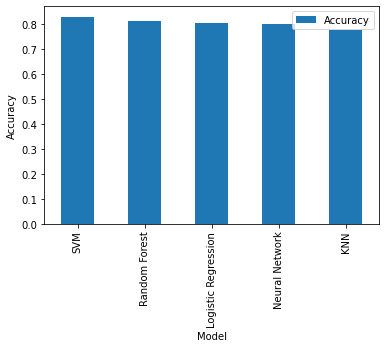

In [386]:
graph=summary.plot(kind='bar')
#graph.set_xlabel('Model')
graph.set_ylabel('Accuracy')